<a href="https://colab.research.google.com/github/nadirawijaya/Skripsi/blob/main/V7_Skripsi_Nadira_80_20_5_Fold_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="text-align:center;"><b>SKRIPSI</b></h1>
<h2 style="text-align:center;">
  <b>Pengaruh Seleksi Fitur IGWO terhadap Kinerja Random Forest, CatBoost, dan XGBoost<br>
  untuk Klasifikasi Penyakit Monkeypox Berdasarkan Gejala</b>
</h2>

<p style="text-align:center;">
  <b>Diajukan oleh:</b><br>
  Nadira Putri Wijaya<br>
  2106635190<br>
  <a href="mailto:nadira.putri11@ui.ac.id">nadira.putri11@ui.ac.id</a>
</p>

<p style="text-align:center;">
  <b>Dosen Pembimbing:</b><br>
  Dra. Bevina Desjwiandra Handari, M.Sc., Ph.D.
</p>

<p style="text-align:center;">
  <b>Program Studi Sarjana Matematika</b><br>
  Departemen Matematika FMIPA Universitas Indonesia<br>
  Depok, Desember 2025
</p>


In [ ]:
# =============================================================================
# STEP 1: PERSIAPAN LINGKUNGAN KERJA DAN PUSTAKA
# Tujuan: Memastikan semua "alat" yang kita butuhkan siap sebelum mulai bekerja.
# Analoginya seperti menyiapkan semua bahan dan peralatan masak sebelum memasak.
# =============================================================================

# Impor pustaka sistem untuk interaksi dasar dengan Python
import sys
import warnings

# --- 1A: Judul dan Pemisah ---
# Memberi judul yang jelas untuk setiap langkah agar alur kerja mudah diikuti.
print("="*80)
print("🚀 STEP 1: Mempersiapkan Lingkungan Kerja dan Pustaka")
print("="*80)

# --- 1B: Cek Lingkungan & Instalasi Otomatis ---
# Kita cek apakah kode ini dijalankan di Google Colab, sebuah platform online gratis.
# Jika ya, semua pustaka yang dibutuhkan akan diinstal secara otomatis.
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    print("📦 Lingkungan Google Colab terdeteksi. Memasang pustaka yang dibutuhkan...")
    # Opsi '-q' digunakan agar proses instalasi tidak menampilkan output yang terlalu ramai.
    !pip install pandas numpy matplotlib seaborn scikit-learn imblearn chardet catboost xgboost -q
    print("✅ Semua pustaka berhasil dipasang!")
else:
    print("📘 Kode dijalankan di lingkungan lokal (PC/Laptop Anda).")
    print("   Pastikan pustaka berikut sudah terpasang: pandas, numpy, matplotlib,")
    print("   seaborn, scikit-learn, imblearn, chardet, catboost, xgboost.")

# --- 1C: Impor Semua Pustaka yang Dibutuhkan ---
# Setelah memastikan semua "alat" terpasang, kita "mengambilnya" untuk siap digunakan.
print("\n📚 Mengimpor pustaka...")

# Pustaka untuk mengelola dan menganalisis data (seperti Excel super canggih)
import pandas as pd
import numpy as np

# Pustaka untuk membuat grafik dan visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Pustaka bantu lainnya
import time  # Untuk mengukur waktu
import re    # Untuk manipulasi teks tingkat lanjut
import chardet # Untuk mendeteksi encoding file

# Pustaka dari Scikit-Learn: "Kotak Perkakas" utama untuk Machine Learning
from sklearn.model_selection import train_test_split  # Untuk membagi data
from sklearn.preprocessing import StandardScaler      # Untuk standarisasi fitur numerik
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, classification_report, confusion_matrix) # Untuk mengukur performa model

# Model Machine Learning yang akan digunakan
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

print("✅ Pustaka berhasil diimpor.")

# --- 1D: Konfigurasi Tampilan dan Peringatan ---
# Mengatur beberapa hal agar hasil kerja kita lebih rapi dan enak dilihat.
print("\n🎨 Menerapkan konfigurasi global untuk tampilan...")

# Menyembunyikan pesan peringatan (warnings) yang tidak krusial.
# Ini seperti mematikan notifikasi yang tidak penting agar kita bisa fokus.
warnings.filterwarnings('ignore')

# Mengatur gaya visual untuk semua grafik agar terlihat profesional dan konsisten.
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis") # Memilih skema warna yang menarik

# Mengatur agar tabel data (DataFrame) dari Pandas ditampilkan lebih informatif.
pd.set_option('display.max_columns', 50) # Tampilkan hingga 50 kolom
pd.set_option('display.width', 120)      # Lebar tampilan tabel

print("✅ Konfigurasi global berhasil diterapkan.")

# --- Penutup Step 1 ---
print("\n" + "="*80)
print("🎉 STEP 1 SELESAI: Lingkungan kerja telah siap sepenuhnya!")
print("="*80)

🚀 STEP 1: Mempersiapkan Lingkungan Kerja dan Pustaka
📦 Lingkungan Google Colab terdeteksi. Memasang pustaka yang dibutuhkan...
✅ Semua pustaka berhasil dipasang!

📚 Mengimpor pustaka...
✅ Pustaka berhasil diimpor.

🎨 Menerapkan konfigurasi global untuk tampilan...
✅ Konfigurasi global berhasil diterapkan.

🎉 STEP 1 SELESAI: Lingkungan kerja telah siap sepenuhnya!


In [ ]:
# =============================================================================
# STEP 2: MEMUAT, MEMBERSIHKAN, & REKAYASA FITUR AWAL (REVISI FINAL)
# =============================================================================
# Impor yang relevan untuk step ini
import pandas as pd
import numpy as np
import re
import chardet
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

print("\n" + "="*80)
print("🚀 STEP 2: Memuat, Membersihkan, & Rekayasa Fitur Awal (REVISI FINAL)")
print("="*80)

# =============================================================================
# BAGIAN A: FUNGSI-FUNGSI BANTU
# =============================================================================

def load_csv_robustly(file_path):
    """
    Fungsi untuk memuat file CSV dengan cara yang "tangguh".
    """
    print(f"🔄 Mencoba memuat file: '{file_path}'...")
    try:
        df = pd.read_csv(file_path, encoding='utf-8')
        print(f"✅ Berhasil dimuat dengan encoding 'utf-8'. Bentuk data: {df.shape}")
        return df
    except Exception:
        print("   - Gagal dengan 'utf-8'. Mencoba deteksi otomatis...")
        try:
            with open(file_path, 'rb') as f:
                encoding = chardet.detect(f.read(100000))['encoding']
            df = pd.read_csv(file_path, encoding=encoding)
            print(f"✅ Berhasil dimuat dengan encoding terdeteksi '{encoding}'. Bentuk data: {df.shape}")
            return df
        except Exception as e:
            print(f"❌ Gagal total memuat file. Error: {e}")
            return None

def clean_column_names_and_duplicates(df):
    """
    Membersihkan nama kolom dan menghapus baris data duplikat.
    """
    print("\n--- 2.1: Membersihkan Nama Kolom & Data Duplikat ---")
    df.columns = [re.sub(r'[^a-z0-9_]+', '_', col.strip().lower()).strip('_') for col in df.columns]
    df.drop(columns=[c for c in ['id', 'patient_id'] if c in df.columns], inplace=True, errors='ignore')
    n_dupes_before = df.duplicated().sum()
    if n_dupes_before > 0:
        df.drop_duplicates(inplace=True)
    print(f"✅ Nama kolom diseragamkan dan {n_dupes_before} baris duplikat dihapus.")
    return df

def standardize_all_values(df, replacement_map):
    """
    Menyeragamkan nilai-nilai di semua kolom teks.
    """
    print("\n--- 2.3: Menyeragamkan Nilai Kategorikal Umum ---")
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].astype(str).str.lower().str.strip().replace(replacement_map)
    print(f"✅ Proses standardisasi nilai umum selesai.")
    return df

# =============================================================================
# BAGIAN B: FUNGSI UTAMA & EKSEKUSI (REVISI FINAL)
# =============================================================================

def run_step2_pipeline_revised():
    """
    Fungsi utama untuk menjalankan pipeline Step 2 dengan logika rekayasa
    fitur 'fever' yang canggih dan lengkap dari V4.
    """
    TARGET_COLUMN = 'diagnosing'
    DEFAULT_FILENAME = 'MonkeyPox Dataset Skripsi.csv'
    VALUE_STANDARDIZATION_MAP = {
        'y': 'yes', 'true': 'yes', '1': 'yes', 'positive': 'yes', 'present': 'yes', 'detected': 'yes',
        'n': 'no', 'false': 'no', '0': 'no', 'negative': 'no', 'absent': 'no', 'not detected': 'no', 'none': 'no',
        'm': 'male', 'man': 'male', 'f': 'female', 'woman': 'female',
        'na': 'unknown', 'n/a': 'unknown', 'not specified': 'unknown', '?': 'unknown'
    }

    # --- 1. Pemuatan Data ---
    df = None
    if 'google.colab' in sys.modules:
        try:
            from google.colab import files
            print("   📤 Silakan unggah file CSV Anda..."); uploaded = files.upload()
            if not uploaded: print("   🚫 Tidak ada file yang diunggah."); return None, None
            df = load_csv_robustly(next(iter(uploaded)))
        except Exception as e: print(f"   💥 Terjadi error saat mengunggah: {e}"); return None, None
    else:
        df = load_csv_robustly(DEFAULT_FILENAME)

    if df is None: return None, None
    if "Monkeypox" in df.columns: df.rename(columns={"Monkeypox": TARGET_COLUMN}, inplace=True)

    # --- 2. Pembersihan Nama Kolom & Duplikat ---
    df_cleaned = clean_column_names_and_duplicates(df)

    # --- 3. REVISI FINAL: Rekayasa Fitur 'fever' (Logika Penuh dari V4) ---
    print("\n--- 2.2: Rekayasa Fitur Awal (Kasus Khusus: 'fever') ---")
    if 'fever' in df_cleaned.columns:
        # Inisialisasi kolom baru
        df_cleaned['fever_presence'] = 'no'
        df_cleaned['fever_duration_days'] = 0

        # Ubah ke lowercase untuk konsistensi
        fever_series = df_cleaned['fever'].astype(str).str.lower()

        # Tentukan keberadaan demam menggunakan regex dari V4
        df_cleaned.loc[fever_series.str.contains('yes|prolonged|coryzal', na=False), 'fever_presence'] = 'yes'

        # Ekstrak durasi demam
        durations = fever_series.str.extract(r'(\d+)').astype(float)
        df_cleaned['fever_duration_days'] = durations[0]

        # Imputasi durasi: jika demam ada tapi durasi kosong, anggap 1 hari.
        df_cleaned['fever_duration_days'] = df_cleaned.apply(
            lambda row: 1 if pd.isna(row['fever_duration_days']) and row['fever_presence'] == 'yes' else row['fever_duration_days'],
            axis=1
        ).fillna(0).astype(int)

        # Hapus kolom 'fever' asli
        df_cleaned.drop(columns=['fever'], inplace=True)
        print("✅ Fitur 'fever' berhasil diubah menjadi 'fever_presence' dan 'fever_duration_days'.")
    else:
        print("   - Kolom 'fever' tidak ditemukan, langkah ini dilewati.")

    # --- 4. Standardisasi Nilai Umum ---
    df_standardized = standardize_all_values(df_cleaned, VALUE_STANDARDIZATION_MAP)

    # --- 5. Pemisahan Fitur (X) dan Target (y) ---
    print("\n--- 2.4: Memisahkan Fitur (X) dan Target (y) ---")
    if TARGET_COLUMN in df_standardized.columns:
        X = df_standardized.drop(columns=[TARGET_COLUMN])
        y = df_standardized[TARGET_COLUMN]
        print(f"   - Kolom target (y) adalah '{TARGET_COLUMN}'.")
        print(f"\n   - Dimensi Fitur (X): {X.shape}\n   - Dimensi Target (y): {y.shape}")
        return X, y
    else:
        print(f"🛑 GAGAL: Kolom target '{TARGET_COLUMN}' tidak ditemukan."); return None, None

# --- Jalankan Pipeline Step 2 yang Sudah Direvisi ---
try:
    X_initial, y_initial = run_step2_pipeline_revised()
    if X_initial is not None:
        print("\n" + "="*80); print("🎉 STEP 2 SELESAI: Data berhasil dimuat, dibersihkan, dan direkayasa."); print("="*80)
    else:
        print("\n" + "="*80); print("🛑 STEP 2 GAGAL. Periksa pesan error di atas."); print("="*80)
except NameError:
    print(f"\n🛑 Gagal: Pastikan file '{DEFAULT_FILENAME}' ada di direktori yang sama, atau jalankan di Colab.")
except Exception as e:
    print(f"\n🛑 Terjadi error tak terduga saat menjalankan Step 2: {e}")


🚀 STEP 2: Memuat, Membersihkan, & Rekayasa Fitur Awal (REVISI FINAL)
   📤 Silakan unggah file CSV Anda...


Saving MonkeyPox Dataset Skripsi.csv to MonkeyPox Dataset Skripsi (3).csv
🔄 Mencoba memuat file: 'MonkeyPox Dataset Skripsi (3).csv'...
✅ Berhasil dimuat dengan encoding 'utf-8'. Bentuk data: (500, 50)

--- 2.1: Membersihkan Nama Kolom & Data Duplikat ---
✅ Nama kolom diseragamkan dan 0 baris duplikat dihapus.

--- 2.2: Rekayasa Fitur Awal (Kasus Khusus: 'fever') ---
✅ Fitur 'fever' berhasil diubah menjadi 'fever_presence' dan 'fever_duration_days'.

--- 2.3: Menyeragamkan Nilai Kategorikal Umum ---
✅ Proses standardisasi nilai umum selesai.

--- 2.4: Memisahkan Fitur (X) dan Target (y) ---
   - Kolom target (y) adalah 'diagnosing'.

   - Dimensi Fitur (X): (500, 49)
   - Dimensi Target (y): (500,)

🎉 STEP 2 SELESAI: Data berhasil dimuat, dibersihkan, dan direkayasa.


In [ ]:
# Menampilkan 10 baris pertama dari tabel fitur (X_initial)
display(X_initial.head(10))

# Menampilkan 10 baris pertama dari tabel target (y_initial)
display(y_initial.head(10))

,age,sex,transmission_rank,country_of_acquisition,smallpox_vaccination_history,hiv_hepatitis_b_and_hepatitis_c_status,rectal_pain_or_pain_on_defecation,dysuria,bleeding_discharge_per_rectum,conjunctivitis,oropharyngeal_manifestations,back_pain,myalgia,headache,sexually_transmitted_infections,lymphadenopathy,approximate_maximum_number_of_concurrent_lesions,distribution_of_lesions,complications_of_illness,monkeypox_viral_dna_detected_in_blood,monkeypox_viral_dna_detected_in_nose_or_throat_swab,monkeypox_viral_dna_detected_in_urine,antivirals_received,day_of_illness_treatment_commenced,complications_of_treatment,duration_of_hospitalization_with_monkeypox_days,sore_throat,chills,wbc_count_cells_mm3_normal_adult_range_4000_9000,hematocrit_normal_39_49_for_men_and_35_45_for_women,platelet_count_109_platelets_l_normal_adult_range_150_400,sodium_level_mmol_l_normal_adult_range_136_145,potassium_level_mmol_l_normal_adult_range_3_5_5_0,blood_urea_nitrogen_level_mg_dl_normal_adult_range_10_20,creatinine_level_mg_dl_normal_adult_range_1_5,calcium_level_mmol_l_normal_adult_range_9_10_5,total_bilirubin_level_mg_dl_normal_adult_range_0_3_1,ast_level_u_l_normal_adult_range_0_35,alt_level_u_l_normal_adult_range_0_35,alp_level_u_l_normal_adult_range_40_140,arthralgia_6_7_to_15_8,albumin_level_mg_dl_normal_adult_range_3_5_5_5,hospitalized,date_confirmation,rt_pcr,outcome_of_monkeypox_infection,diagnosed_disease,fever_presence,fever_duration_days
0,49,female,isolated,nigeria,no,no,yes,no,no,yes,tonsillar erythema,no,yes,yes,rectum,yes,150,"face, scalp, trunk, limbs, palms, glans penis,...",low mood and emotional lability. ulcerated ing...,yes,yes,yes,brincidofovir 200 mg (one dose) orally,7,transaminitis (peak alt 331 u/l),26,yes,yes,22135,48,109,129,2.4,8.4,2.2,8.20,1.0,41,37,147,10.0,2.5,yes,5/6/2022,yes,full recovery,monkeypox,yes,2
1,52,female,index,spain,no,yes,no,yes,no,yes,abscess,yes,no,no,purulent penile discharge.,no,40,"face, trunk, arms, and legs","deep tissue abscesses, severe pain, and low mood",no,no,yes,no,7,"transaminitis (peak alt 127 u/l), nausea, and ...",15,yes,no,14026,48,138,131,1.9,8.4,1.8,7.30,1.1,42,37,145,9.8,1.9,yes,8/31/2022,no,full recovery,monkeypox,yes,1
2,76,male,index,nigeria,no,no,yes,no,yes,yes,pustules,yes,yes,no,throat,yes,100,"face, trunk, limbs, palms, soles, and scrotum","deep tissue abscesses, severe pain, and low mood",yes,yes,yes,brincidofovir 200 mg (two dose) orally,6,transaminitis (peak alt 550 u/l),27,yes,no,26742,56,131,117,2.9,8.3,1.5,6.10,1.0,38,42,149,11.0,2.8,yes,5/12/2022,yes,full recovery,monkeypox,yes,4
3,42,female,secondary,nigeria,mva six days post-exposure or 12 days pre-illness,yes,no,yes,no,no,oedema,yes,no,yes,urethra/urine,no,32,"face, trunk, hands (including nail bed), and l...","conjunctivitis, painful disruption of thumbnai...",yes,yes,yes,brincidofovir 200 mg (two dose) orally,7,"transaminitis (peak alt 127 u/l), nausea, and ...",35,yes,no,24688,49,115,126,2.4,7.8,1.7,8.30,1.6,43,41,143,6.6,2.0,yes,8/13/2022,yes,full recovery,monkeypox,yes,1
4,67,male,isolated,nigeria,no,no,no,yes,no,yes,abscess,no,yes,no,multiple site,yes,100,"face, scalp, trunk, limbs, penile shaft, palms...",ulcerated inguinal lesion with delayed healing,yes,yes,yes,brincidofovir 200 mg (two dose) orally,7,no,39,yes,yes,20346,52,144,126,3.3,7.9,1.8,7.70,1.4,43,38,143,7.0,2.7,yes,5/15/2022,no,full recovery,monkeypox,yes,2
5,74,female,index,uk,no,no,no,yes,no,no,tonsillar erythema,yes,yes,yes,throat,yes,40,"face, trunk, limbs, palms, and penile shaft",no,no,yes,no,no,10,no,13,no,yes,21414,48,123,110,3.1,7.6,1.6,8.80,1.8,43,39,141,7.6,2.9,yes,5/15/2022,yes,full recovery,monkeypox,no,0
6,78,male,tertiary,nigeria,no,not tested (parents negative),no,no,yes,yes,pustules,yes,yes,no,unknown,yes,30,"face, trunk, arms, and legs",pruritis and contact dermatitis from cleaning ...,yes,yes,no,no,4,no,22,yes,no,14649,58,131,130,2.9,7.7,2.1,8.50,1.2,39,38,141,6.8,2.7,yes,6/19/2022,no,full recovery,monkeypox,no,0
7,44,female,sec

,diagnosing
0,yes
1,yes
2,yes
3,yes
4,yes
5,yes
6,yes
7,yes
8,yes
9,no


In [ ]:
# =============================================================================
# STEP 3: PEMBAGIAN DATA & REKAYASA FITUR SISA (REVISI FINAL)
# Tujuan: 1. Membagi data menjadi set latih dan uji (80/20).
#         2. Melakukan rekayasa fitur pada kolom kompleks yang tersisa SETELAH
#            data dipisah untuk mencegah data leakage.
# =============================================================================
# Impor pustaka yang dibutuhkan untuk step ini
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

print("\n" + "="*80)
print("🚀 STEP 3: Membagi Data & Rekayasa Fitur Sisa (REVISI FINAL)")
print("="*80)

# =============================================================================
# BAGIAN A: FUNGSI PEMBAGIAN DATA
# =============================================================================
def split_data(X, y, test_size=0.20, random_state=123):
    """
    Membagi data menjadi set Latih (80%) dan Uji (20%).
    """
    print("--- 3.1: Memisahkan Data Menjadi Set Latih (Training) dan Uji (Test) ---")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=test_size,
        random_state=random_state,
        stratify=y
    )
    print(f"✅ Data berhasil dipisahkan dengan rasio 80:20 (Latih:Uji).")
    print("\n   Bentuk Data Hasil Pemisahan:")
    print(f"   - Data Latih (X_train, y_train): {X_train.shape}, {y_train.shape}")
    print(f"   - Data Uji   (X_test, y_test):  {X_test.shape}, {y_test.shape}")
    return X_train, X_test, y_train, y_test

# =============================================================================
# BAGIAN B: FUNGSI REKAYASA FITUR
# =============================================================================
def perform_structural_engineering(df, df_name="data"):
    """
    Mengekstrak informasi dari kolom-kolom kompleks yang tersisa.
    """
    print(f"\n   - Menerapkan rekayasa fitur pada set data: {df_name}...")
    df_engineered = df.copy()

    # --- REVISI: Blok 'fever' sudah tidak ada lagi di sini ---
    # Logika untuk 'fever' telah dieksekusi di STEP 2.

    # --- Membongkar kolom 'antivirals_received' ---
    if 'antivirals_received' in df_engineered.columns:
        col = df_engineered['antivirals_received'].astype(str).str.lower().fillna('none')
        df_engineered['antiviral_name'] = col.str.extract(r'(\w+)').fillna('none')
        df_engineered['antiviral_dosage_mg'] = col.str.extract(r'(\d+)').fillna(0).astype(int)
        df_engineered.drop(columns=['antivirals_received'], inplace=True)

    # --- Membongkar kolom 'complications_of_treatment' ---
    if 'complications_of_treatment' in df_engineered.columns:
        col = df_engineered['complications_of_treatment'].astype(str).str.lower().fillna('none')
        df_engineered['has_treatment_complication'] = np.where(col == 'none', 0, 1)
        df_engineered['peak_alt_level'] = col.str.extract(r'(\d+)').fillna(0).astype(int)
        df_engineered.drop(columns=['complications_of_treatment'], inplace=True)

    return df_engineered

# =============================================================================
# BAGIAN C: EKSEKUSI UTAMA
# =============================================================================
try:
    if 'X_initial' in locals() and 'y_initial' in locals():
        # === Langkah 1: Panggil fungsi pemisahan data ===
        X_train, X_test, y_train, y_test = split_data(
            X_initial, y_initial, test_size=0.20, random_state=123
        )

        # === Langkah 2: Terapkan rekayasa fitur sisa SETELAH data dipisah ===
        print("\n--- 3.2: Menerapkan Rekayasa Fitur Struktural Sisa ---")
        X_train_featured = perform_structural_engineering(X_train, "X_train (Data Latih)")
        X_test_featured = perform_structural_engineering(X_test, "X_test (Data Uji)")

        print("\n✅ Rekayasa fitur struktural sisa selesai.")
        print("\n" + "-"*60)
        print("HASIL AKHIR STEP 3:")
        print(f"   - Dimensi X_train setelah rekayasa fitur: {X_train_featured.shape}")
        print(f"   - Dimensi X_test setelah rekayasa fitur:  {X_test_featured.shape}")
        print("-" * 60)

        print("\n" + "🎉"*60)
        print("STEP 3 SELESAI: Data telah dipisah dan fitur sisa telah direkayasa.")
        print("="*80)
    else:
        print("🛑 GAGAL: Step 3 tidak dapat dijalankan. Pastikan Step 2 berhasil dan menghasilkan variabel `X_initial` dan `y_initial`.")

except Exception as e:
    print(f"🛑 Terjadi error tak terduga saat menjalankan Step 3: {e}")


🚀 STEP 3: Membagi Data & Rekayasa Fitur Sisa (REVISI FINAL)
--- 3.1: Memisahkan Data Menjadi Set Latih (Training) dan Uji (Test) ---
✅ Data berhasil dipisahkan dengan rasio 80:20 (Latih:Uji).

   Bentuk Data Hasil Pemisahan:
   - Data Latih (X_train, y_train): (400, 49), (400,)
   - Data Uji   (X_test, y_test):  (100, 49), (100,)

--- 3.2: Menerapkan Rekayasa Fitur Struktural Sisa ---

   - Menerapkan rekayasa fitur pada set data: X_train (Data Latih)...

   - Menerapkan rekayasa fitur pada set data: X_test (Data Uji)...

✅ Rekayasa fitur struktural sisa selesai.

------------------------------------------------------------
HASIL AKHIR STEP 3:
   - Dimensi X_train setelah rekayasa fitur: (400, 51)
   - Dimensi X_test setelah rekayasa fitur:  (100, 51)
------------------------------------------------------------

🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉
STEP 3 SELESAI: Data telah dipisah dan fitur sisa telah direkayasa.



🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺
STEP 3B: Diagnosis Awal dengan Learning Curve
🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺
--- Mempersiapkan data untuk diagnosis awal ---
   - Target (y_train) di-encode sementara untuk plot. 'yes' -> 1, 'no' -> 0.
   - Diagnosis akan dijalankan pada 19 fitur numerik.

--- Menghasilkan Learning Curve Diagnostik ---


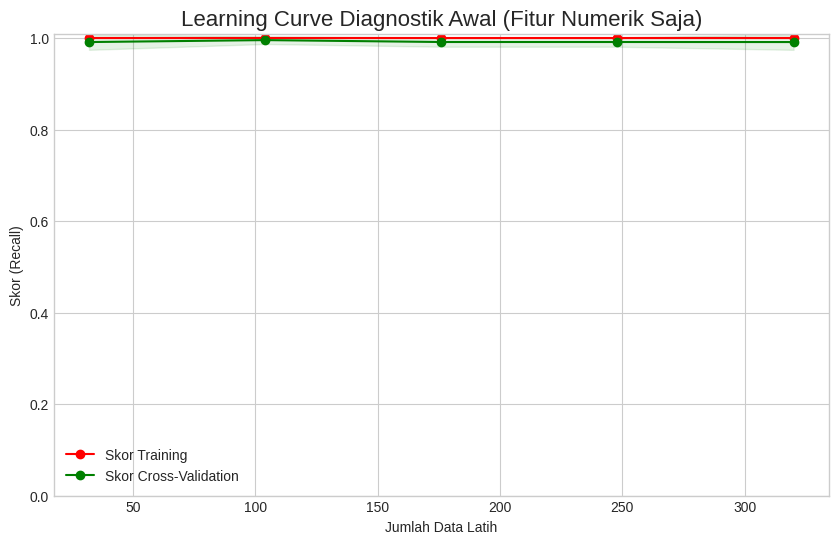


🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉
STEP 3B SELESAI: Diagnosis awal berhasil dilakukan.


In [ ]:
# =============================================================================
# STEP 3B: DIAGNOSIS AWAL DENGAN LEARNING CURVE (REVISI)
# =============================================================================
# Impor yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
# REVISI: Tambahkan LabelEncoder
from sklearn.preprocessing import LabelEncoder

print("\n" + "🩺"*40)
print("STEP 3B: Diagnosis Awal dengan Learning Curve")
print("🩺"*40)

# =============================================================================
# BAGIAN A: FUNGSI BANTU UNTUK MEMBUAT PLOT (TIDAK BERUBAH)
# =============================================================================
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5), scoring='recall'):
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(10, 6))

    axes.set_title(title, fontsize=16)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Jumlah Data Latih")
    axes.set_ylabel(f"Skor ({scoring.capitalize()})")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs,
        train_sizes=train_sizes, scoring=scoring)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Mengabaikan nilai NaN saat plot untuk mencegah plot kosong
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1, color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1, color="g")

    axes.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Skor Training")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Skor Cross-Validation")

    axes.legend(loc="best")
    axes.grid(True)
    return plt

# =============================================================================
# BAGIAN B: EKSEKUSI UTAMA (DENGAN REVISI)
# =============================================================================
try:
    if 'X_train' in locals() and 'y_train' in locals():
        print("--- Mempersiapkan data untuk diagnosis awal ---")

        # 1. Pilih HANYA fitur numerik dari X_train
        X_train_numeric_only = X_train.select_dtypes(include=np.number).copy()

        # 2. Isi nilai kosong (jika ada) dengan 0 untuk diagnosis cepat
        X_train_numeric_only.fillna(0, inplace=True)

        # ====================================================================
        # REVISI: Encode y_train dari teks ('yes'/'no') menjadi angka (1/0)
        # ====================================================================
        le = LabelEncoder()
        y_train_encoded_diag = le.fit_transform(y_train)
        print(f"   - Target (y_train) di-encode sementara untuk plot. '{le.classes_[1]}' -> 1, '{le.classes_[0]}' -> 0.")
        # ====================================================================

        print(f"   - Diagnosis akan dijalankan pada {X_train_numeric_only.shape[1]} fitur numerik.")

        # 3. Inisialisasi model dengan parameter default
        diagnostic_model = RandomForestClassifier(random_state=123, n_jobs=-1)

        # 4. Buat strategi cross-validation
        cv_strategy_diag = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

        # 5. Buat dan tampilkan plot (sekarang menggunakan y yang sudah di-encode)
        print("\n--- Menghasilkan Learning Curve Diagnostik ---")
        plot_learning_curve(diagnostic_model, "Learning Curve Diagnostik Awal (Fitur Numerik Saja)",
                            X_train_numeric_only, y_train_encoded_diag, ylim=(0.0, 1.01),
                            cv=cv_strategy_diag, scoring='recall')
        plt.show()

        print("\n" + "🎉"*60)
        print("STEP 3B SELESAI: Diagnosis awal berhasil dilakukan.")
        print("="*80)

    else:
        print("🛑 GAGAL: Step 3B tidak bisa dijalankan. Pastikan `X_train` dan `y_train` dari Step 3 tersedia.")

except Exception as e:
    print(f"🛑 Terjadi error tak terduga saat menjalankan Step 3B: {e}")

In [ ]:
# =============================================================================
# STEP 4: SELEKSI FITUR & KEBOCORAN DATA (REVISI FINAL)
# =============================================================================
import pandas as pd
from IPython.display import display

print("\n" + "="*80)
print("🚀 STEP 4: Seleksi Fitur & Investigasi Kebocoran Data (REVISI FINAL)")
print("="*80)

# =============================================================================
# BAGIAN A: CLASS FEATURE SELECTOR (DENGAN LOGIKA KEYWORD)
# =============================================================================
class FeatureSelector:
    """
    REVISI FINAL: Menggunakan metode seleksi berbasis kata kunci yang robust
    dan konsisten dengan nama fitur baru dari Step 2.
    """
    def __init__(self):
        self.final_feature_list_ = None

    def fit(self, X_train, y_train):
        print("--- 4.1: Tahap 'fit' (Belajar) - Menganalisis Fitur dari Data Latih ---")

        print("   - Tahap A: Memilih fitur berdasarkan kata kunci klinis...")
        clinically_relevant_features = self._get_features_by_keyword(X_train.columns)

        print("   - Tahap B: Menginvestigasi potensi kebocoran data...")
        leaky_features = self._investigate_leakage(X_train[clinically_relevant_features], y_train)

        self.final_feature_list_ = [
            col for col in clinically_relevant_features if col not in leaky_features
        ]

        print(f"\n✅ Tahap 'fit' selesai. Ditemukan {len(self.final_feature_list_)} fitur final untuk digunakan.")
        return self

    def transform(self, *dataframes):
        if self.final_feature_list_ is None:
            raise RuntimeError("Metode .fit() harus dijalankan sebelum .transform()!")

        print("\n--- 4.2: Tahap 'transform' (Menerapkan) - Memfilter Fitur ---")
        transformed_dfs = []
        for df in dataframes:
            cols_to_keep = [col for col in self.final_feature_list_ if col in df.columns]
            transformed_dfs.append(df[cols_to_keep].copy())

        print("✅ Aturan seleksi fitur yang sama berhasil diterapkan pada kedua set data.")
        return transformed_dfs

    def _get_features_by_keyword(self, all_columns):
        """
        REVISI UTAMA: Fungsi ini sekarang memilih kolom jika namanya MENGANDUNG
        salah satu kata kunci dan disesuaikan dengan output dari Step 2.
        """
        keywords = [
            # Gejala & Tanda Klinis
            'lymphadenopathy', 'headache', 'myalgia', 'back_pain', 'chills', 'sore_throat',
            'oropharyngeal', 'conjunctivitis', 'arthralgia', 'rectal_pain', 'dysuria', 'bleeding',
            'distribution_of_lesions', 'concurrent_lesions',

            # Fitur Rekayasa (konsisten dengan Step 2)
            'fever_presence', 'fever_duration_days',

            # Panel Hasil Lab (kata kunci unik)
            'platelet', 'hematocrit', 'wbc', 'ast_level', 'alt_level', 'albumin',
            'calcium', 'urea', 'bilirubin', 'creatinine', 'sodium', 'potassium', 'alp_level',

            # Riwayat & Demografi
            'hiv', 'vaccination', 'sexually_transmitted', 'age', 'sex', 'country'
        ]

        selected_cols = []
        for col in all_columns:
            if any(keyword in col for keyword in keywords):
                selected_cols.append(col)

        selected_cols = sorted(list(set(selected_cols)))

        print(f"     -> Ditemukan {len(selected_cols)} fitur yang cocok dengan kata kunci klinis.")
        return selected_cols

    def _investigate_leakage(self, df, target):
        """Fungsi ini tidak diubah, sudah benar."""
        leaky_features = []
        df_with_target = pd.concat([df, target], axis=1)
        for feature in df.columns:
            if df[feature].dtype == 'object' or df[feature].nunique() < 20:
                crosstab = pd.crosstab(df[feature], df_with_target[target.name])
                if (crosstab > 0).sum(axis=1).min() == 1:
                    print("\n" + "-"*60)
                    print(f"   🚨 DITEMUKAN POTENSI LEAKAGE PADA FITUR: '{feature}'")
                    display(crosstab)
                    print(f"   KESIMPULAN: Fitur '{feature}' akan DIHAPUS.")
                    print("-" * 60)
                    leaky_features.append(feature)
        if not leaky_features:
            print("     -> ✅ Tidak ditemukan fitur dengan kebocoran data yang sempurna.")
        return leaky_features

# =============================================================================
# BAGIAN B: EKSEKUSI UTAMA
# =============================================================================
try:
    if 'X_train_featured' in locals() and 'y_train' in locals():
        X_train_input = X_train_featured
        X_test_input = X_test_featured

        selector = FeatureSelector()
        selector.fit(X_train_input, y_train)

        X_train_selected, X_test_selected = selector.transform(X_train_input, X_test_input)

        print("\n" + "-"*60)
        print("HASIL AKHIR STEP 4:")
        print(f"   - Dimensi X_train setelah diseleksi: {X_train_selected.shape}")
        print(f"   - Dimensi X_test setelah diseleksi:  {X_test_selected.shape}")
        print("-" * 60)

        print("\n" + "🎉"*60)
        print("STEP 4 SELESAI: Fitur terbaik telah dipilih dengan metode KEYWORD yang aman.")
        print("="*80)
    else:
        print("🛑 GAGAL: Step 4 tidak bisa dijalankan. Pastikan variabel dari Step 3 (`X_train_featured`, etc.) tersedia.")
except Exception as e:
    print(f"🛑 Terjadi error tak terduga saat menjalankan Step 4: {e}")


🚀 STEP 4: Seleksi Fitur & Investigasi Kebocoran Data (REVISI FINAL)
--- 4.1: Tahap 'fit' (Belajar) - Menganalisis Fitur dari Data Latih ---
   - Tahap A: Memilih fitur berdasarkan kata kunci klinis...
     -> Ditemukan 37 fitur yang cocok dengan kata kunci klinis.
   - Tahap B: Menginvestigasi potensi kebocoran data...

------------------------------------------------------------
   🚨 DITEMUKAN POTENSI LEAKAGE PADA FITUR: 'antiviral_dosage_mg'


diagnosing,no,yes
antiviral_dosage_mg,,
0,0,63
200,162,163
600,0,12


   KESIMPULAN: Fitur 'antiviral_dosage_mg' akan DIHAPUS.
------------------------------------------------------------

------------------------------------------------------------
   🚨 DITEMUKAN POTENSI LEAKAGE PADA FITUR: 'approximate_maximum_number_of_concurrent_lesions'


diagnosing,no,yes
approximate_maximum_number_of_concurrent_lesions,,
10,0,11
30,0,2
32,0,35
40,0,58
56,49,0
57,3,0
59,2,0
60,3,0
69,2,0


   KESIMPULAN: Fitur 'approximate_maximum_number_of_concurrent_lesions' akan DIHAPUS.
------------------------------------------------------------

------------------------------------------------------------
   🚨 DITEMUKAN POTENSI LEAKAGE PADA FITUR: 'arthralgia_6_7_to_15_8'


diagnosing,no,yes
arthralgia_6_7_to_15_8,,
6.0,0,2
6.5,1,0
6.6,0,32
6.8,0,4
7.0,103,2
7.2,0,3
7.6,0,2
8.0,45,0
8.3,0,3


   KESIMPULAN: Fitur 'arthralgia_6_7_to_15_8' akan DIHAPUS.
------------------------------------------------------------

------------------------------------------------------------
   🚨 DITEMUKAN POTENSI LEAKAGE PADA FITUR: 'back_pain'


diagnosing,no,yes
back_pain,,
no,0,115
yes,162,123


   KESIMPULAN: Fitur 'back_pain' akan DIHAPUS.
------------------------------------------------------------

------------------------------------------------------------
   🚨 DITEMUKAN POTENSI LEAKAGE PADA FITUR: 'bleeding_discharge_per_rectum'


diagnosing,no,yes
bleeding_discharge_per_rectum,,
no,162,203
yes,0,35


   KESIMPULAN: Fitur 'bleeding_discharge_per_rectum' akan DIHAPUS.
------------------------------------------------------------

------------------------------------------------------------
   🚨 DITEMUKAN POTENSI LEAKAGE PADA FITUR: 'chills'


diagnosing,no,yes
chills,,
no,162,128
yes,0,110


   KESIMPULAN: Fitur 'chills' akan DIHAPUS.
------------------------------------------------------------

------------------------------------------------------------
   🚨 DITEMUKAN POTENSI LEAKAGE PADA FITUR: 'conjunctivitis'


diagnosing,no,yes
conjunctivitis,,
no,162,39
yes,0,199


   KESIMPULAN: Fitur 'conjunctivitis' akan DIHAPUS.
------------------------------------------------------------

------------------------------------------------------------
   🚨 DITEMUKAN POTENSI LEAKAGE PADA FITUR: 'country_of_acquisition'


diagnosing,no,yes
country_of_acquisition,,
argentina,2,4
australia,6,0
bangladesh,0,1
belgium,3,0
benin,0,3
cambodia,11,3
canada,3,6
congo,0,3
cote d’ivoire,0,3


   KESIMPULAN: Fitur 'country_of_acquisition' akan DIHAPUS.
------------------------------------------------------------

------------------------------------------------------------
   🚨 DITEMUKAN POTENSI LEAKAGE PADA FITUR: 'distribution_of_lesions'


diagnosing,no,yes
distribution_of_lesions,,
"face, scalp, trunk, limbs, palms, glans penis, and scrotum",0,98
"face, scalp, trunk, limbs, penile shaft, palms, and soles",49,3
"face, trunk, arms, and hands",0,11
"face, trunk, arms, and legs",113,59
"face, trunk, hands (including nail bed), and labia majora",0,36
"face, trunk, limbs, palms, and penile shaft",0,2
"face, trunk, limbs, palms, soles, and scrotum",0,29


   KESIMPULAN: Fitur 'distribution_of_lesions' akan DIHAPUS.
------------------------------------------------------------

------------------------------------------------------------
   🚨 DITEMUKAN POTENSI LEAKAGE PADA FITUR: 'dysuria'


diagnosing,no,yes
dysuria,,
no,162,141
yes,0,97


   KESIMPULAN: Fitur 'dysuria' akan DIHAPUS.
------------------------------------------------------------

------------------------------------------------------------
   🚨 DITEMUKAN POTENSI LEAKAGE PADA FITUR: 'fever_duration_days'


diagnosing,no,yes
fever_duration_days,,
0,162,17
1,0,89
2,0,104
4,0,28


   KESIMPULAN: Fitur 'fever_duration_days' akan DIHAPUS.
------------------------------------------------------------

------------------------------------------------------------
   🚨 DITEMUKAN POTENSI LEAKAGE PADA FITUR: 'fever_presence'


diagnosing,no,yes
fever_presence,,
no,162,17
yes,0,221


   KESIMPULAN: Fitur 'fever_presence' akan DIHAPUS.
------------------------------------------------------------

------------------------------------------------------------
   🚨 DITEMUKAN POTENSI LEAKAGE PADA FITUR: 'headache'


diagnosing,no,yes
headache,,
no,0,98
yes,162,140


   KESIMPULAN: Fitur 'headache' akan DIHAPUS.
------------------------------------------------------------

------------------------------------------------------------
   🚨 DITEMUKAN POTENSI LEAKAGE PADA FITUR: 'hiv_hepatitis_b_and_hepatitis_c_status'


diagnosing,no,yes
hiv_hepatitis_b_and_hepatitis_c_status,,
no,0,146
not tested (parents negative),0,2
yes,162,90


   KESIMPULAN: Fitur 'hiv_hepatitis_b_and_hepatitis_c_status' akan DIHAPUS.
------------------------------------------------------------

------------------------------------------------------------
   🚨 DITEMUKAN POTENSI LEAKAGE PADA FITUR: 'oropharyngeal_manifestations'


diagnosing,no,yes
oropharyngeal_manifestations,,
abscess,0,61
oedema,0,36
pustules,0,29
tonsillar erythema,47,101
unknown,115,11


   KESIMPULAN: Fitur 'oropharyngeal_manifestations' akan DIHAPUS.
------------------------------------------------------------

------------------------------------------------------------
   🚨 DITEMUKAN POTENSI LEAKAGE PADA FITUR: 'peak_alt_level'


diagnosing,no,yes
peak_alt_level,,
0,162,23
127,0,89
331,0,97
550,0,29


   KESIMPULAN: Fitur 'peak_alt_level' akan DIHAPUS.
------------------------------------------------------------

------------------------------------------------------------
   🚨 DITEMUKAN POTENSI LEAKAGE PADA FITUR: 'rectal_pain_or_pain_on_defecation'


diagnosing,no,yes
rectal_pain_or_pain_on_defecation,,
no,162,100
yes,0,138


   KESIMPULAN: Fitur 'rectal_pain_or_pain_on_defecation' akan DIHAPUS.
------------------------------------------------------------

------------------------------------------------------------
   🚨 DITEMUKAN POTENSI LEAKAGE PADA FITUR: 'sexually_transmitted_infections'


diagnosing,no,yes
sexually_transmitted_infections,,
multiple site,0,3
purulent penile discharge.,0,55
rectal perforation,0,11
rectum,0,98
throat,0,31
unknown,162,2
urethra/urine,0,38


   KESIMPULAN: Fitur 'sexually_transmitted_infections' akan DIHAPUS.
------------------------------------------------------------

------------------------------------------------------------
   🚨 DITEMUKAN POTENSI LEAKAGE PADA FITUR: 'smallpox_vaccination_history'


diagnosing,no,yes
smallpox_vaccination_history,,
mva six days post exposure or 12 days pre-illness,61,62
mva six days post-exposure or 12 days pre-illness,0,1
no,101,175


   KESIMPULAN: Fitur 'smallpox_vaccination_history' akan DIHAPUS.
------------------------------------------------------------

------------------------------------------------------------
   🚨 DITEMUKAN POTENSI LEAKAGE PADA FITUR: 'total_bilirubin_level_mg_dl_normal_adult_range_0_3_1'


diagnosing,no,yes
total_bilirubin_level_mg_dl_normal_adult_range_0_3_1,,
0.3,11,0
0.4,7,0
0.5,12,0
0.6,15,0
0.7,13,0
0.8,12,0
0.9,8,0
1.0,13,17
1.1,5,34


   KESIMPULAN: Fitur 'total_bilirubin_level_mg_dl_normal_adult_range_0_3_1' akan DIHAPUS.
------------------------------------------------------------

✅ Tahap 'fit' selesai. Ditemukan 17 fitur final untuk digunakan.

--- 4.2: Tahap 'transform' (Menerapkan) - Memfilter Fitur ---
✅ Aturan seleksi fitur yang sama berhasil diterapkan pada kedua set data.

------------------------------------------------------------
HASIL AKHIR STEP 4:
   - Dimensi X_train setelah diseleksi: (400, 17)
   - Dimensi X_test setelah diseleksi:  (100, 17)
------------------------------------------------------------

🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉
STEP 4 SELESAI: Fitur terbaik telah dipilih dengan metode KEYWORD yang aman.


In [ ]:
# =============================================================================
# STEP 5: ANALISIS KARAKTERISTIK FITUR KATEGORIKAL
# Tujuan: Memahami "keragaman" atau "kompleksitas" dari setiap fitur teks (kategorikal)
#         yang telah kita pilih.
# Analoginya: Jika kita punya sekantong kelereng aneka warna (fitur), kita ingin
#             menghitung ada berapa banyak warna unik di dalamnya (kardinalitas).
#             Informasi ini akan sangat membantu kita di langkah selanjutnya (encoding).
# =============================================================================

print("\n" + "="*80)
print("🚀 STEP 5: Menganalisis Karakteristik Fitur Kategorikal")
print("="*80)

# =============================================================================
# Catatan Metodologi:
# 1. Berbasis Data Latih: Analisis ini WAJIB dilakukan HANYA pada `X_train_selected`.
#    Ini untuk mencegah "kebocoran informasi" dari data uji. Semua keputusan
#    tentang cara memproses fitur harus didasarkan pada apa yang kita "pelajari"
#    dari data latih.
# 2. Deterministik: Proses ini hanya menghitung, tidak ada unsur acak.
# =============================================================================

try:
    if 'X_train_selected' in locals():
        print("🔬 Menganalisis fitur-fitur kategorikal pada data latih (`X_train_selected`)...")

        # Pilih hanya kolom yang berisi data teks/kategori
        categorical_cols = X_train_selected.select_dtypes(include=['object', 'category']).columns

        if not categorical_cols.empty:
            analysis_list = []
            for col in categorical_cols:
                # Ambil nilai-nilai unik dan hitung jumlahnya
                unique_values = X_train_selected[col].unique()
                num_unique = len(unique_values)
                analysis_list.append({
                    'Nama Fitur': col,
                    'Jumlah Nilai Unik (Kardinalitas)': num_unique,
                    'Contoh Nilai': list(unique_values[:3]) # Ambil 3 contoh pertama
                })

            # Buat laporan dalam bentuk tabel DataFrame
            df_analysis_report = pd.DataFrame(analysis_list).sort_values(
                by='Jumlah Nilai Unik (Kardinalitas)', ascending=False
            )

            print("\n" + "---"*25)
            print("📊 LAPORAN KARDINALITAS FITUR KATEGORIKAL")
            print("---"*25)
            print("Kardinalitas adalah jumlah kategori unik dalam sebuah fitur.")
            print("   - Kardinalitas RENDAH (< 10): Mudah di-handle (contoh: 'sex').")
            print("   - Kardinalitas TINGGI (> 10): Perlu perhatian khusus saat encoding (contoh: 'country').")

            # Tampilkan tabel dengan visualisasi bar untuk perbandingan yang mudah
            display(df_analysis_report.style.bar(
                subset=['Jumlah Nilai Unik (Kardinalitas)'], color='#5fba7d'
            ))

            print("\n" + "🎉"*60)
            print("STEP 5 SELESAI: Analisis fitur kategorikal berhasil.")
            print("="*80)
        else:
            print("\n✅ Tidak ada fitur kategorikal yang tersisa untuk dianalisis setelah proses seleksi.")
            print("\n" + "🎉"*60)
            print("STEP 5 SELESAI: (Tidak ada tindakan yang diperlukan).")
            print("="*80)
    else:
        print("🛑 GAGAL: Step 5 tidak bisa dijalankan. Pastikan `X_train_selected` dari Step 4 tersedia.")
except Exception as e:
    print(f"🛑 Terjadi error tak terduga saat menjalankan Step 5: {e}")


🚀 STEP 5: Menganalisis Karakteristik Fitur Kategorikal
🔬 Menganalisis fitur-fitur kategorikal pada data latih (`X_train_selected`)...

---------------------------------------------------------------------------
📊 LAPORAN KARDINALITAS FITUR KATEGORIKAL
---------------------------------------------------------------------------
Kardinalitas adalah jumlah kategori unik dalam sebuah fitur.
   - Kardinalitas RENDAH (< 10): Mudah di-handle (contoh: 'sex').
   - Kardinalitas TINGGI (> 10): Perlu perhatian khusus saat encoding (contoh: 'country').


,Nama Fitur,Jumlah Nilai Unik (Kardinalitas),Contoh Nilai
0,lymphadenopathy,2,"['no', 'yes']"
1,myalgia,2,"['no', 'yes']"
2,sex,2,"['male', 'female']"
3,sore_throat,2,"['yes', 'no']"



🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉
STEP 5 SELESAI: Analisis fitur kategorikal berhasil.


In [ ]:
# =============================================================================
# STEP 6: PENANGANAN NILAI YANG HILANG (MISSING VALUES)
# Tujuan: Mengisi "data yang bolong" atau "kosong" (missing values). Sebagian
#         besar model machine learning tidak bisa bekerja jika ada data yang kosong.
# Analoginya: Seperti seorang guru yang menemukan beberapa jawaban kosong di lembar
#             ujian siswa. Guru tersebut harus memiliki strategi untuk mengisi
#             kekosongan itu secara adil dan konsisten.
# =============================================================================
# Impor yang dibutuhkan untuk step ini.
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

print("\n" + "="*80)
print("🚀 STEP 6: Menangani Nilai yang Hilang (Missing Values)")
print("="*80)

# =============================================================================
# BAGIAN A: FUNGSI-FUNGSI BANTU
# =============================================================================

def analyze_missing_values(X_train):
    """
    Menganalisis dan melaporkan nilai yang hilang HANYA pada data latih.
    Ini adalah tahap "investigasi" sebelum melakukan tindakan.
    """
    print("--- 6.1: Tahap Investigasi - Menganalisis Nilai Hilang di Data Latih ---")

    missing_values = X_train.isnull().sum()
    missing_values = missing_values[missing_values > 0] # Filter hanya kolom yang punya nilai hilang

    if missing_values.empty:
        print("✅ LUAR BIASA! Tidak ditemukan nilai yang hilang pada data latih.")
        return None

    # Buat laporan yang merangkum rencana penanganan
    imputation_plan = pd.DataFrame({
        'Jumlah Hilang': missing_values,
        'Persentase Hilang (%)': (missing_values / len(X_train) * 100).round(1),
        'Tipe Data': X_train.dtypes[missing_values.index],
        'Strategi Pengisian': [ # Menentukan strategi berdasarkan tipe data
            'Median (Nilai Tengah)' if pd.api.types.is_numeric_dtype(X_train[col]) else 'Modus (Nilai Terbanyak)'
            for col in missing_values.index
        ]
    }).sort_values(by='Jumlah Hilang', ascending=False)

    print(f"   - Ditemukan {len(imputation_plan)} kolom dengan data kosong. Berikut rencana penanganannya:")
    print("     - Untuk kolom ANGKA, kita isi dengan MEDIAN (nilai tengah) agar tahan terhadap outlier.")
    print("     - Untuk kolom TEKS, kita isi dengan MODUS (nilai yang paling sering muncul).")

    # Tampilkan rencana dengan visualisasi gradien warna
    display(imputation_plan.style.background_gradient(cmap='Reds', subset=['Jumlah Hilang']))

    # Visualisasi bar plot untuk pemahaman cepat
    plt.figure(figsize=(12, max(5, len(imputation_plan) * 0.4))) # Tinggi plot dinamis
    sns.barplot(x=imputation_plan['Jumlah Hilang'], y=imputation_plan.index, palette='viridis')
    plt.title('Visualisasi Jumlah Nilai Hilang per Kolom', fontsize=16)
    plt.xlabel('Jumlah Nilai yang Hilang')
    plt.ylabel('Nama Fitur')
    plt.tight_layout()
    plt.show()

    return imputation_plan

def execute_imputation(X_train, X_test, plan):
    """
    Mengeksekusi pengisian nilai hilang dengan metodologi fit/transform yang aman.
    """
    print("\n--- 6.2: Tahap Eksekusi - Mengisi Nilai Hilang Secara Aman ---")

    X_train_imputed = X_train.copy()
    X_test_imputed = X_test.copy()

    # Pisahkan daftar kolom berdasarkan strategi yang sudah direncanakan
    num_cols = plan[plan['Strategi Pengisian'] == 'Median (Nilai Tengah)'].index.tolist()
    cat_cols = plan[plan['Strategi Pengisian'] == 'Modus (Nilai Terbanyak)'].index.tolist()

    # Buat "alat" pengisi (imputer)
    num_imputer = SimpleImputer(strategy='median')
    cat_imputer = SimpleImputer(strategy='most_frequent')

    # --- TAHAP 1: BELAJAR (fit) ---
    # "Alat" ini akan BELAJAR dari data latih untuk mengetahui berapa nilai
    # median dan modus yang harus digunakan. Ini adalah "kunci jawaban".
    print("   1. BELAJAR (fit): Menghitung 'kunci jawaban' (median/modus) HANYA dari data LATIH...")
    if num_cols:
        num_imputer.fit(X_train[num_cols])
    if cat_cols:
        cat_imputer.fit(X_train[cat_cols])
    print("      ✅ 'Kunci jawaban' berhasil dipelajari.")

    # --- TAHAP 2: MENERAPKAN (transform) ---
    # Sekarang kita gunakan "kunci jawaban" yang sama untuk mengisi data kosong
    # di data latih DAN data uji. Ini memastikan perlakuan yang konsisten.
    print("   2. MENERAPKAN (transform): Menggunakan 'kunci jawaban' untuk mengisi data LATIH dan UJI...")
    if num_cols:
        X_train_imputed[num_cols] = num_imputer.transform(X_train[num_cols])
        X_test_imputed[num_cols] = num_imputer.transform(X_test[num_cols])
    if cat_cols:
        X_train_imputed[cat_cols] = cat_imputer.transform(X_train[cat_cols])
        X_test_imputed[cat_cols] = cat_imputer.transform(X_test[cat_cols])
    print("      ✅ Data kosong di kedua set berhasil diisi secara konsisten.")

    return X_train_imputed, X_test_imputed

# =============================================================================
# BAGIAN B: EKSEKUSI UTAMA
# =============================================================================
try:
    if 'X_train_selected' in locals():
        # TAHAP 1: ANALISIS untuk membuat rencana
        imputation_plan = analyze_missing_values(X_train_selected)

        # Jika tidak ada yang perlu diisi, langsung ke tahap verifikasi
        if imputation_plan is None:
            X_train_imputed = X_train_selected.copy()
            X_test_imputed = X_test_selected.copy()
        else:
            # TAHAP 2: EKSEKUSI berdasarkan rencana
            X_train_imputed, X_test_imputed = execute_imputation(X_train_selected, X_test_selected, imputation_plan)

        # TAHAP 3: VERIFIKASI untuk memastikan semua sudah terisi
        print("\n--- 6.3: Tahap Verifikasi - Memeriksa Ulang Hasil ---")
        train_missing = X_train_imputed.isnull().sum().sum()
        test_missing = X_test_imputed.isnull().sum().sum()
        print(f"   - Sisa nilai kosong di data latih (setelah diisi): {train_missing}")
        print(f"   - Sisa nilai kosong di data uji (setelah diisi):   {test_missing}")
        if train_missing == 0 and test_missing == 0:
            print("   - ✅ BERHASIL! Semua data yang 'bolong' telah ditambal.")

        print("\n" + "🎉"*60)
        print("STEP 6 SELESAI: Nilai yang hilang telah ditangani dengan metode yang aman dan transparan.")
        print("="*80)
    else:
        print("🛑 GAGAL: Step 6 tidak bisa dijalankan. Pastikan `X_train_selected` dari Step 4 tersedia.")
except Exception as e:
    print(f"🛑 Terjadi error tak terduga saat menjalankan Step 6: {e}")


🚀 STEP 6: Menangani Nilai yang Hilang (Missing Values)
--- 6.1: Tahap Investigasi - Menganalisis Nilai Hilang di Data Latih ---
✅ LUAR BIASA! Tidak ditemukan nilai yang hilang pada data latih.

--- 6.3: Tahap Verifikasi - Memeriksa Ulang Hasil ---
   - Sisa nilai kosong di data latih (setelah diisi): 0
   - Sisa nilai kosong di data uji (setelah diisi):   0
   - ✅ BERHASIL! Semua data yang 'bolong' telah ditambal.

🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉
STEP 6 SELESAI: Nilai yang hilang telah ditangani dengan metode yang aman dan transparan.



🚀 STEP 7: Investigasi Outlier (Tanpa Penanganan)
--- 7.1: Tahap Investigasi - Menganalisis Outlier di Data Latih ---
   - Menganalisis 13 kolom numerik...


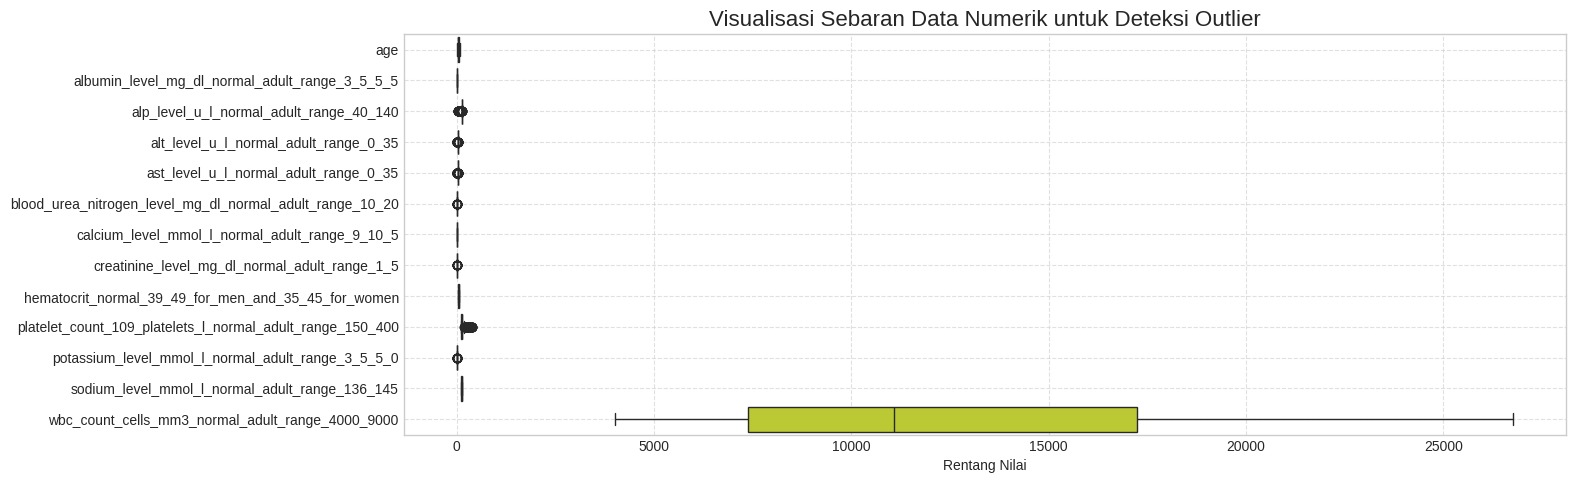


   - Laporan Outlier yang Terdeteksi dan Batas Wajarnya:


,Nama Kolom,Jumlah Outlier,% dari Data,Batas Bawah Wajar,Batas Atas Wajar
0,alp_level_u_l_normal_adult_range_40_140,74,18.50%,131.00,155.00
2,ast_level_u_l_normal_adult_range_0_35,68,17.00%,30.00,46.00
5,platelet_count_109_platelets_l_normal_adult_range_150_400,65,16.25%,75.50,191.50
1,alt_level_u_l_normal_adult_range_0_35,62,15.50%,28.50,48.50
6,potassium_level_mmol_l_normal_adult_range_3_5_5_0,23,5.75%,1.05,4.65
3,blood_urea_nitrogen_level_mg_dl_normal_adult_range_10_20,17,4.25%,2.05,18.45
4,creatinine_level_mg_dl_normal_adult_range_1_5,13,3.25%,0.40,2.80


⭐ **Catatan:** Laporan di atas hanya untuk tujuan diagnostik. Data tidak diubah.


--- 7.2: Meneruskan Data Tanpa Modifikasi ---
✅ Proses penanganan outlier dilewati. Data diteruskan ke step berikutnya.
   - Dimensi X_train_processed: (400, 17)
   - Dimensi X_test_processed:  (100, 17)

🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉
STEP 7 SELESAI: Investigasi outlier berhasil, data telah diteruskan tanpa perubahan.


In [ ]:
# =============================================================================
# STEP 7: INVESTIGASI OUTLIER (TANPA PENANGANAN)
# =============================================================================
# Impor yang dibutuhkan untuk step ini.
import numpy as np
import pandas as pd
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import seaborn as sns

print("\n" + "="*80)
print("🚀 STEP 7: Investigasi Outlier (Tanpa Penanganan)")
print("="*80)

# =============================================================================
# BAGIAN A: FUNGSI ANALISIS OUTLIER
# =============================================================================

def investigate_outliers_only(X_train):
    """
    Menganalisis dan melaporkan outlier secara mendalam HANYA pada data latih.
    Fungsi ini TIDAK mengubah data, hanya menghasilkan laporan.
    """
    print("--- 7.1: Tahap Investigasi - Menganalisis Outlier di Data Latih ---")

    numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist()
    if not numerical_cols:
        print("✅ Tidak ada kolom numerik untuk dianalisis outliernya.")
        return

    print(f"   - Menganalisis {len(numerical_cols)} kolom numerik...")

    # --- Visualisasi Awal: Boxplot untuk melihat sebaran data ---
    plt.figure(figsize=(15, max(5, len(numerical_cols) * 0.4)))
    sns.boxplot(data=X_train[numerical_cols], orient='h', palette='viridis')
    plt.title('Visualisasi Sebaran Data Numerik untuk Deteksi Outlier', fontsize=16)
    plt.xlabel('Rentang Nilai')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

    # --- Perhitungan Batas Outlier dengan Metode IQR ---
    outlier_report_list = []
    for col in numerical_cols:
        Q1 = X_train[col].quantile(0.25)
        Q3 = X_train[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = X_train[(X_train[col] < lower_bound) | (X_train[col] > upper_bound)]

        if not outliers.empty:
            outlier_report_list.append({
                'Nama Kolom': col,
                'Jumlah Outlier': len(outliers),
                '% dari Data': f"{(len(outliers) / len(X_train) * 100):.2f}%",
                # REVISI: Simpan sebagai angka (float), bukan string
                'Batas Bawah Wajar': lower_bound,
                'Batas Atas Wajar': upper_bound,
            })

    if not outlier_report_list:
        print("\n✅ Tidak ditemukan outlier signifikan pada data latih.")
        return

    outlier_df = pd.DataFrame(outlier_report_list).sort_values(by='Jumlah Outlier', ascending=False)
    print("\n   - Laporan Outlier yang Terdeteksi dan Batas Wajarnya:")

    # Sekarang baris ini akan bekerja dengan benar karena datanya adalah angka
    display(outlier_df.style.format({'Batas Bawah Wajar': '{:.2f}', 'Batas Atas Wajar': '{:.2f}'})
                          .bar(subset=['Jumlah Outlier'], color='coral'))
    display(Markdown("⭐ **Catatan:** Laporan di atas hanya untuk tujuan diagnostik. Data tidak diubah."))

# =============================================================================
# BAGIAN B: EKSEKUSI UTAMA
# =============================================================================
try:
    # Pastikan nama variabel ini sesuai dengan output dari step Anda sebelumnya
    if 'X_train_imputed' in locals():

        # TAHAP 1: JALANKAN FUNGSI INVESTIGASI
        investigate_outliers_only(X_train_imputed)

        # TAHAP 2: TERUSKAN DATA TANPA MODIFIKASI
        # Karena kita hanya menginvestigasi, kita teruskan data asli ke step berikutnya.
        X_train_processed = X_train_imputed.copy()
        X_test_processed = X_test_imputed.copy()

        print("\n--- 7.2: Meneruskan Data Tanpa Modifikasi ---")
        print("✅ Proses penanganan outlier dilewati. Data diteruskan ke step berikutnya.")
        print(f"   - Dimensi X_train_processed: {X_train_processed.shape}")
        print(f"   - Dimensi X_test_processed:  {X_test_processed.shape}")

        print("\n" + "🎉"*60)
        print("STEP 7 SELESAI: Investigasi outlier berhasil, data telah diteruskan tanpa perubahan.")
        print("="*80)
    else:
        print("🛑 GAGAL: Step 7 tidak bisa dijalankan. Pastikan `X_train_imputed` tersedia dari Step 6.")
except Exception as e:
    print(f"🛑 Terjadi error tak terduga saat menjalankan Step 7: {e}")

In [ ]:
# =============================================================================
# STEP 8: TAHAP PREPROCESSING FINAL (PIPELINE TRANSFORMASI)
# Tujuan: Mengubah semua data menjadi format numerik murni yang siap "dimakan"
#         oleh model machine learning. Ini adalah langkah terakhir sebelum training.
# Analoginya: Seperti menyiapkan hidangan akhir. Kita sudah mencuci (cleaning),
#             memotong (feature engineering), dan sekarang kita akan memasaknya
#             (encoding & scaling) agar siap disajikan (ke model).
# Alat Utama: `ColumnTransformer`. Ini seperti sebuah "pabrik perakitan" otomatis.
#             Kita mendefinisikan aturan untuk setiap tipe "bahan" (kolom), dan
#             pabrik ini akan memproses semuanya secara paralel dan konsisten.
# =============================================================================
# Impor yang dibutuhkan untuk step ini.
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from IPython.display import display

print("\n" + "="*80)
print("🚀 STEP 8: Tahap Preprocessing Final dengan ColumnTransformer")
print("="*80)

# =============================================================================
# BAGIAN A: FUNGSI UNTUK REKAYASA FITUR TAMBAHAN
# Membuat fitur baru yang merupakan "ringkasan" dari fitur lain.
# =============================================================================

def create_symptom_score(df):
    """
    Menghitung skor gejala sederhana.
    Tujuannya adalah memberi model sebuah fitur ringkasan: "Berapa banyak
    gejala utama yang dimiliki pasien ini?"
    """
    # Menghitung jumlah kolom yang nilainya 'yes' untuk setiap baris
    symptom_score = (df == 'yes').sum(axis=1)
    return symptom_score.to_frame('symptom_score')

def create_age_group(df):
    """
    Mengelompokkan umur ke dalam beberapa kategori.
    Terkadang, kelompok umur lebih informatif bagi model daripada umur spesifik.
    Contoh: Risiko penyakit bisa jadi lebih tinggi pada kelompok 'lansia' secara umum.
    """
    if 'age' not in df.columns or df.empty:
        return pd.DataFrame(index=df.index) # Kembalikan frame kosong jika tidak ada kolom 'age'
    # Bins: [0-18], [19-40], [41-65], [66+]
    age_group = pd.cut(df['age'], bins=[0, 18, 40, 65, np.inf], labels=[0, 1, 2, 3])
    return age_group.to_frame('age_group')

# =============================================================================
# BAGIAN B: FUNGSI UNTUK MEMBANGUN "PABRIK PREPROCESSING"
# =============================================================================

def build_preprocessor(X_train):
    """
    Mendesain dan membangun 'pabrik' ColumnTransformer kita.
    """
    print("--- 8.1: Mendesain Alur Kerja di 'Pabrik' Preprocessing ---")

    # --- 1. Identifikasi "Bahan Baku" (Tipe Kolom) ---
    all_categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
    all_numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist()

    # --- 2. Tentukan Kolom untuk Setiap "Stasiun Kerja" ---
    # Stasiun Rekayasa Fitur
    symptom_cols_for_eng = [col for col in ['chills', 'sore_throat', 'headache', 'myalgia'] if col in X_train.columns]
    age_col_for_eng = ['age'] if 'age' in all_numerical_cols else []

    # Stasiun Encoding (hanya untuk kolom kategorikal yang BUKAN gejala)
    cat_cols_for_ohe = [col for col in all_categorical_cols if col not in symptom_cols_for_eng]

    # Stasiun Scaling (hanya untuk kolom numerik yang BUKAN umur)
    num_cols_for_scaling = [col for col in all_numerical_cols if col not in age_col_for_eng]

    print(f"   - Ditemukan {len(symptom_cols_for_eng)} kolom gejala untuk dijadikan 'symptom_score'.")
    print(f"   - Kolom 'age' akan dijadikan 'age_group'.")
    print(f"   - {len(cat_cols_for_ohe)} kolom teks lainnya akan di-OneHotEncode.")
    print(f"   - {len(num_cols_for_scaling)} kolom angka lainnya akan di-StandardScale.")

    # --- 3. Definisikan "Mesin" untuk Setiap Stasiun Kerja ---
    # One-Hot Encoding: Mengubah kolom teks (misal: 'sex' -> 'male', 'female') menjadi
    #                 kolom angka biner (misal: 'sex_male' -> 1/0, 'sex_female' -> 1/0).
    #                 Ini adalah cara "menerjemahkan" teks ke bahasa yang dimengerti model.
    categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

    # Standard Scaling: Menyamakan skala semua fitur numerik. Ini penting agar fitur
    #                   dengan nilai besar (misal: platelet_count ribuan) tidak
    #                   mendominasi fitur dengan nilai kecil (misal: demam 1-5 hari).
    numerical_transformer = StandardScaler()

    # --- 4. Rakit "Pabrik" ColumnTransformer ---
    # Kita menyusun semua "stasiun kerja" dan "mesin" ke dalam satu alur kerja.
    preprocessor = ColumnTransformer(
        transformers=[
            # ('nama_stasiun', mesin, kolom_yang_diproses)
            ('symptom_score_eng', FunctionTransformer(create_symptom_score), symptom_cols_for_eng),
            ('age_group_eng', FunctionTransformer(create_age_group), age_col_for_eng),
            ('cat_encoding', categorical_transformer, cat_cols_for_ohe),
            ('num_scaling', numerical_transformer, num_cols_for_scaling)
        ],
        remainder='passthrough' # Kolom yang tidak disebut akan dilewatkan tanpa diubah
    )

    print("\n✅ Desain 'pabrik' preprocessing berhasil dibuat.")
    return preprocessor, cat_cols_for_ohe, num_cols_for_scaling

# =============================================================================
# BAGIAN C: EKSEKUSI UTAMA
# =============================================================================
try:
    if 'X_train_processed' in locals():
        X_train_input = X_train_processed
        X_test_input = X_test_processed

        # 1. Bangun "pabrik" preprocessor
        preprocessor, ohe_cols, scaled_cols = build_preprocessor(X_train_input)

        # 2. Jalankan Proses Fit & Transform
        print("\n--- 8.2: Menjalankan 'Pabrik' Preprocessing ---")

        # BELAJAR (fit): "Pabrik" akan mempelajari parameter PENTING dari data latih.
        # - Encoder belajar semua kategori unik yang ada.
        # - Scaler belajar nilai mean dan standar deviasi.
        # Ini adalah tahap "kalibrasi mesin".
        print("   - Tahap 1: BELAJAR (fit) / Kalibrasi Mesin HANYA dari data latih...")
        preprocessor.fit(X_train_input)
        print("     ✅ Parameter (kategori, mean, std) berhasil dipelajari.")

        # MENERAPKAN (transform): "Pabrik" yang sudah terkalibrasi sekarang
        # memproses data latih dan data uji dengan aturan yang SAMA PERSIS.
        print("   - Tahap 2: MENERAPKAN (transform) / Memproses data latih dan uji...")
        X_train_final_np = preprocessor.transform(X_train_input)
        X_test_final_np = preprocessor.transform(X_test_input)
        print("     ✅ Data berhasil ditransformasi menjadi format numerik.")

        # 3. Rekonstruksi Nama Kolom
        # Output dari ColumnTransformer adalah array NumPy (tabel angka tanpa nama kolom).
        # Kita perlu membangun kembali nama kolom secara manual agar hasilnya mudah dibaca.
        print("\n--- 8.3: Memberi Label Ulang pada Hasil Produksi ---")
        eng_names = ['symptom_score', 'age_group']
        ohe_names = list(preprocessor.named_transformers_['cat_encoding'].get_feature_names_out(ohe_cols))
        final_feature_names = eng_names + ohe_names + scaled_cols

        # Konversi kembali ke DataFrame Pandas yang rapi
        X_train_final = pd.DataFrame(X_train_final_np, index=X_train_input.index, columns=final_feature_names)
        X_test_final = pd.DataFrame(X_test_final_np, index=X_test_input.index, columns=final_feature_names)
        print("   ✅ DataFrame akhir dengan nama kolom yang benar berhasil dibuat.")

        # --- Laporan Akhir ---
        print("\n" + "🏁"*40)
        print("PROSES PREPROCESSING SELESAI")
        print("🏁"*40)
        print(f"\n   - Dimensi Data Latih Final: {X_train_final.shape}")
        print(f"   - Dimensi Data Uji Final:  {X_test_final.shape}")
        if X_train_final.shape[1] == X_test_final.shape[1]:
            print("   ✅ Jumlah kolom konsisten. Data 100% siap untuk modeling!")

        print("\n   Contoh data yang siap dimasukkan ke model (X_train_final):")
        display(X_train_final.head())
        print("="*80)

    else:
        print("🛑 GAGAL: Step 8 tidak bisa dijalankan. Pastikan `X_train_processed` dari Step 7 tersedia.")
except Exception as e:
    print(f"🛑 Terjadi error tak terduga saat menjalankan Step 8: {e}")


🚀 STEP 8: Tahap Preprocessing Final dengan ColumnTransformer
--- 8.1: Mendesain Alur Kerja di 'Pabrik' Preprocessing ---
   - Ditemukan 2 kolom gejala untuk dijadikan 'symptom_score'.
   - Kolom 'age' akan dijadikan 'age_group'.
   - 2 kolom teks lainnya akan di-OneHotEncode.
   - 12 kolom angka lainnya akan di-StandardScale.

✅ Desain 'pabrik' preprocessing berhasil dibuat.

--- 8.2: Menjalankan 'Pabrik' Preprocessing ---
   - Tahap 1: BELAJAR (fit) / Kalibrasi Mesin HANYA dari data latih...
     ✅ Parameter (kategori, mean, std) berhasil dipelajari.
   - Tahap 2: MENERAPKAN (transform) / Memproses data latih dan uji...
     ✅ Data berhasil ditransformasi menjadi format numerik.

--- 8.3: Memberi Label Ulang pada Hasil Produksi ---
   ✅ DataFrame akhir dengan nama kolom yang benar berhasil dibuat.

🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁
PROSES PREPROCESSING SELESAI
🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁

   - Dimensi Data Latih Final: (400, 18)
   - Dimensi Data Uji Final:  (100,

,symptom_score,age_group,lymphadenopathy_no,lymphadenopathy_yes,sex_female,sex_male,albumin_level_mg_dl_normal_adult_range_3_5_5_5,alp_level_u_l_normal_adult_range_40_140,alt_level_u_l_normal_adult_range_0_35,ast_level_u_l_normal_adult_range_0_35,blood_urea_nitrogen_level_mg_dl_normal_adult_range_10_20,calcium_level_mmol_l_normal_adult_range_9_10_5,creatinine_level_mg_dl_normal_adult_range_1_5,hematocrit_normal_39_49_for_men_and_35_45_for_women,platelet_count_109_platelets_l_normal_adult_range_150_400,potassium_level_mmol_l_normal_adult_range_3_5_5_0,sodium_level_mmol_l_normal_adult_range_136_145,wbc_count_cells_mm3_normal_adult_range_4000_9000
312,1.0,0.0,1.0,0.0,0.0,1.0,-0.762178,0.337669,0.828442,0.308265,-0.709460,-1.378061,0.528838,0.781649,-0.192955,-1.035658,0.253645,0.243421
51,1.0,0.0,1.0,0.0,0.0,1.0,-0.247193,0.411923,0.618111,0.508762,-0.824515,-0.671691,0.103642,0.024604,-0.498808,-0.510776,0.155333,-1.159673
356,2.0,3.0,0.0,1.0,0.0,1.0,-0.556184,0.560430,0.407780,0.809509,-0.766987,-0.759987,0.528838,1.538694,-0.850538,-0.248335,-1.319346,-0.511215
226,2.0,0.0,1.0,0.0,0.0,1.0,1.194766,-0.144980,-1.274870,-2.699197,1.160189,0.988277,-1.384547,-1.489486,1.519820,1.195091,1.433388,-0.667079
199,2.0,2.0,0.0,1.0,1.0,0.0,0.061798,0.449050,0.302614,0.208016,-0.421821,0.122975,-0.534153,-0.732441,-0.269418,-0.248335,0.253645,-0.440324


In [ ]:
# =============================================================================
# STEP 9: ENCODING VARIABEL TARGET (y)
# Tujuan: Mengubah label target kita yang berupa teks (misal: 'yes', 'no')
#         menjadi format angka (misal: 1, 0). Model machine learning hanya
#         bisa memproses angka, bukan teks.
# Analoginya: Seperti mengubah jawaban pilihan ganda "Benar" atau "Salah" pada
#             lembar ujian menjadi skor 1 atau 0 agar bisa dihitung oleh komputer.
# =============================================================================
# Impor yang dibutuhkan untuk step ini.
from sklearn.preprocessing import LabelEncoder

print("\n" + "="*80)
print("🚀 STEP 9: Mengubah Variabel Target (y) Menjadi Angka")
print("="*80)

# =============================================================================
# BAGIAN A: FUNGSI UTAMA & EKSEKUSI
# =============================================================================

def run_step9_target_encoding(y_train, y_test):
    """
    Melakukan encoding pada variabel target (y_train dan y_test)
    dengan metodologi fit/transform untuk menjamin konsistensi.
    """
    # Kita definisikan mana yang dianggap sebagai kelas "positif".
    # Ini penting untuk evaluasi model nanti (misal: precision & recall).
    POSITIVE_LABEL = 'yes'

    # LabelEncoder adalah "mesin penerjemah" dari teks ke angka.
    le = LabelEncoder()

    # --- 9.1: BELAJAR (fit) Aturan Terjemahan dari Data Latih ---
    # "Mesin" ini akan melihat semua label unik di y_train ('yes', 'no')
    # dan membuat "kamus terjemahan" internalnya.
    print("--- 9.1: Belajar 'Kamus Terjemahan' dari Data Latih (y_train)... ---")
    # .fit_transform() adalah shortcut untuk belajar dan langsung menerjemahkan.
    y_train_encoded = le.fit_transform(y_train)
    print("   ✅ 'Kamus' berhasil dibuat dan diterapkan pada y_train.")

    # --- 9.2: MENERAPKAN (transform) Aturan yang Sama ke Data Uji ---
    # Sekarang, kita gunakan "kamus" yang SAMA PERSIS yang sudah dibuat dari
    # data latih untuk menerjemahkan y_test. Ini krusial untuk konsistensi.
    # Kita tidak boleh membuat kamus baru dari data uji.
    print("\n--- 9.2: Menerapkan 'Kamus' yang Sama pada Data Uji (y_test)... ---")
    y_test_encoded = le.transform(y_test)
    print("   ✅ Terjemahan konsisten berhasil diterapkan pada y_test.")

    # --- 9.3: Laporan Hasil Terjemahan ---
    print("\n--- 9.3: Laporan 'Kamus Terjemahan' yang Dibuat ---")

    positive_class_index = None
    for index, label in enumerate(le.classes_):
        print(f"   - Label Teks: '{label}'  --> Diterjemahkan menjadi Angka: {index}")
        if str(label).lower() == POSITIVE_LABEL:
            positive_class_index = index

    if positive_class_index is not None:
        print(f"\n   - PENTING: Kelas positif ('{POSITIVE_LABEL}') akan diwakili oleh angka: {positive_class_index}")
    else:
        print(f"\n   - ⚠️ PERINGATAN: Label kelas positif ('{POSITIVE_LABEL}') tidak ditemukan dalam data latih.")

    # Kembalikan hasil terjemahan dan "kamus"-nya
    return y_train_encoded, y_test_encoded, le

# --- Eksekusi Utama ---
try:
    if 'y_train' in locals() and 'y_test' in locals():
        y_train_encoded, y_test_encoded, label_encoder = run_step9_target_encoding(y_train, y_test)

        print("\n   Dimensi Data Target Setelah Diubah Menjadi Angka:")
        print(f"   - y_train_encoded: {y_train_encoded.shape}")
        print(f"   - y_test_encoded:  {y_test_encoded.shape}")

        print("\n" + "🎉"*60)
        print("STEP 9 SELESAI: Variabel target kini dalam format numerik.")
        print("Semua data (X dan y) sekarang 100% siap untuk tahap pemodelan!")
        print("="*80)
    else:
        print("🛑 GAGAL: Step 9 tidak bisa dijalankan. Pastikan `y_train` dan `y_test` dari Step 3 tersedia.")
except Exception as e:
    print(f"🛑 Terjadi error tak terduga saat menjalankan Step 9: {e}")


🚀 STEP 9: Mengubah Variabel Target (y) Menjadi Angka
--- 9.1: Belajar 'Kamus Terjemahan' dari Data Latih (y_train)... ---
   ✅ 'Kamus' berhasil dibuat dan diterapkan pada y_train.

--- 9.2: Menerapkan 'Kamus' yang Sama pada Data Uji (y_test)... ---
   ✅ Terjemahan konsisten berhasil diterapkan pada y_test.

--- 9.3: Laporan 'Kamus Terjemahan' yang Dibuat ---
   - Label Teks: 'no'  --> Diterjemahkan menjadi Angka: 0
   - Label Teks: 'yes'  --> Diterjemahkan menjadi Angka: 1

   - PENTING: Kelas positif ('yes') akan diwakili oleh angka: 1

   Dimensi Data Target Setelah Diubah Menjadi Angka:
   - y_train_encoded: (400,)
   - y_test_encoded:  (100,)

🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉
STEP 9 SELESAI: Variabel target kini dalam format numerik.
Semua data (X dan y) sekarang 100% siap untuk tahap pemodelan!



🚀 STEP 10: Membersihkan Fitur Berdasarkan Korelasi Tinggi (DIAKTIFKAN KEMBALI)
--- 10.1: Menganalisis Korelasi Fitur vs. Target (Ambang Batas > 0.7) ---
   - PENTING: Korelasi dihitung HANYA menggunakan data latih untuk mencegah 'kebocoran data'.

   - Ditemukan 5 fitur dengan korelasi absolut > 0.7 terhadap target.

   --- Laporan Fitur yang Akan Dihapus ---


,Nama Fitur,Nilai Korelasi Absolut
0,platelet_count_109_platelets_l_normal_adult_ra...,0.807668
1,creatinine_level_mg_dl_normal_adult_range_1_5,0.787942
2,alt_level_u_l_normal_adult_range_0_35,0.774769
3,ast_level_u_l_normal_adult_range_0_35,0.741511
4,blood_urea_nitrogen_level_mg_dl_normal_adult_r...,0.735934


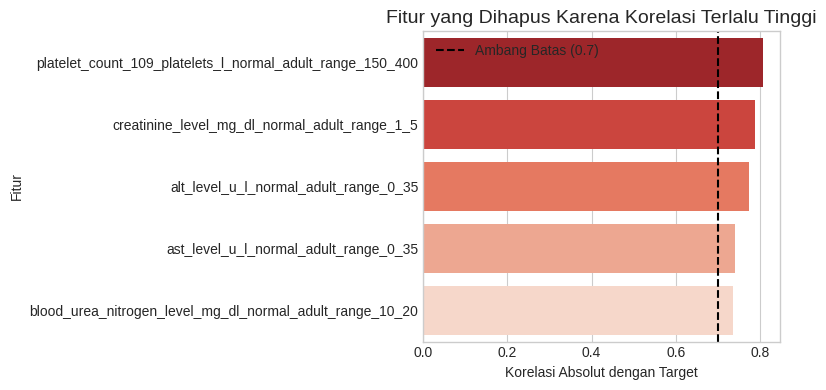


--- 10.2: Menerapkan Penghapusan Fitur ---
   - ✅ Penghapusan fitur selesai.

--- Perbandingan Ukuran Data Setelah Pembersihan ---
   - Dimensi X_train: (400, 13) (Sebelumnya: (400, 18))
   - Dimensi X_test:  (100, 13) (Sebelumnya: (100, 18))

🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉
STEP 10 SELESAI: Fitur yang terlalu prediktif telah dibersihkan.


In [ ]:
# =============================================================================
# STEP 10: PEMBERSIHAN FITUR AKHIR BERDASARKAN KORELASI (DIAKTIFKAN KEMBALI)
# Tujuan: Menghapus fitur-fitur hasil lab yang terlalu prediktif untuk
#         memaksa model belajar dari pola yang lebih subtle dan membedakan
#         kinerja antar model.
# =============================================================================
# Impor yang dibutuhkan untuk step ini.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("\n" + "="*80)
print("🚀 STEP 10: Membersihkan Fitur Berdasarkan Korelasi Tinggi (DIAKTIFKAN KEMBALI)")
print("="*80)

# =============================================================================
# BAGIAN A: FUNGSI UTAMA & EKSEKUSI
# =============================================================================

def run_step10_correlation_cleaning(X_train, X_test, y_train, correlation_threshold=0.70):
    """
    Menganalisis korelasi dan menghapus fitur-fitur yang terlalu kuat
    (kemungkinan besar hasil lab yang super-prediktif).
    """
    print(f"--- 10.1: Menganalisis Korelasi Fitur vs. Target (Ambang Batas > {correlation_threshold}) ---")
    print("   - PENTING: Korelasi dihitung HANYA menggunakan data latih untuk mencegah 'kebocoran data'.")

    target_series = pd.Series(y_train, index=X_train.index, name='TARGET')
    df_for_corr = pd.concat([X_train, target_series], axis=1)

    # Menggunakan metode 'spearman' bisa lebih robust terhadap non-linearitas
    corr_with_target = df_for_corr.corr(method='spearman', numeric_only=True)['TARGET'].abs().drop(labels=['TARGET'])

    features_to_drop = corr_with_target[corr_with_target > correlation_threshold].index.tolist()

    if not features_to_drop:
        print(f"\n   ✅ Tidak ada fitur yang melebihi ambang batas korelasi {correlation_threshold}.")
        print("      Data dari langkah sebelumnya akan digunakan tanpa perubahan.")
        return X_train, X_test

    print(f"\n   - Ditemukan {len(features_to_drop)} fitur dengan korelasi absolut > {correlation_threshold} terhadap target.")

    print("\n   --- Laporan Fitur yang Akan Dihapus ---")
    report_df = corr_with_target[features_to_drop].sort_values(ascending=False).reset_index()
    report_df.columns = ['Nama Fitur', 'Nilai Korelasi Absolut']
    display(report_df)

    # Visualisasi
    plt.figure(figsize=(8, max(4, len(report_df) * 0.3)))
    sns.barplot(x='Nilai Korelasi Absolut', y='Nama Fitur', data=report_df, palette='Reds_r')
    plt.title('Fitur yang Dihapus Karena Korelasi Terlalu Tinggi', fontsize=14)
    plt.axvline(x=correlation_threshold, color='black', linestyle='--', label=f'Ambang Batas ({correlation_threshold})')
    plt.legend()
    plt.xlabel('Korelasi Absolut dengan Target')
    plt.ylabel('Fitur')
    plt.tight_layout()
    plt.show()

    print("\n--- 10.2: Menerapkan Penghapusan Fitur ---")
    X_train_clean = X_train.drop(columns=features_to_drop, errors='ignore')
    X_test_clean = X_test.drop(columns=features_to_drop, errors='ignore')

    print("   - ✅ Penghapusan fitur selesai.")
    return X_train_clean, X_test_clean

# --- Eksekusi Utama ---
try:
    if 'X_train_final' in locals() and 'y_train_encoded' in locals():
        # REVISI: Threshold diubah menjadi 0.70 sesuai saran Anda
        X_train_clean, X_test_clean = run_step10_correlation_cleaning(
            X_train_final, X_test_final, y_train_encoded, correlation_threshold=0.70
        )

        print("\n--- Perbandingan Ukuran Data Setelah Pembersihan ---")
        print(f"   - Dimensi X_train: {X_train_clean.shape} (Sebelumnya: {X_train_final.shape})")
        print(f"   - Dimensi X_test:  {X_test_clean.shape} (Sebelumnya: {X_test_final.shape})")

        print("\n" + "🎉"*60)
        print("STEP 10 SELESAI: Fitur yang terlalu prediktif telah dibersihkan.")
        print("="*80)
    else:
        print("🛑 GAGAL: Step 10 tidak dapat dijalankan. Pastikan data dari Step 8 & 9 (`X_train_final`, dll.) tersedia.")
except Exception as e:
    print(f"🛑 Terjadi error tak terduga saat menjalankan Step 10: {e}")


🚀 STEP 11: Menyeimbangkan Data Latih Menggunakan SMOTE
--- 11.1: Menganalisis Distribusi Kelas Sebelum SMOTE ---
   - Distribusi kelas awal pada y_train:
     - Kelas 1: 238 sampel
     - Kelas 0: 162 sampel

--- 11.2: Menerapkan SMOTE untuk Membuat 'Kloning' Data Minoritas ---
   - ✅ Data latih berhasil diseimbangkan.

--- 11.3: Verifikasi Distribusi Kelas Setelah SMOTE ---
   - Distribusi kelas setelah SMOTE:
     - Kelas 0: 238 sampel
     - Kelas 1: 238 sampel


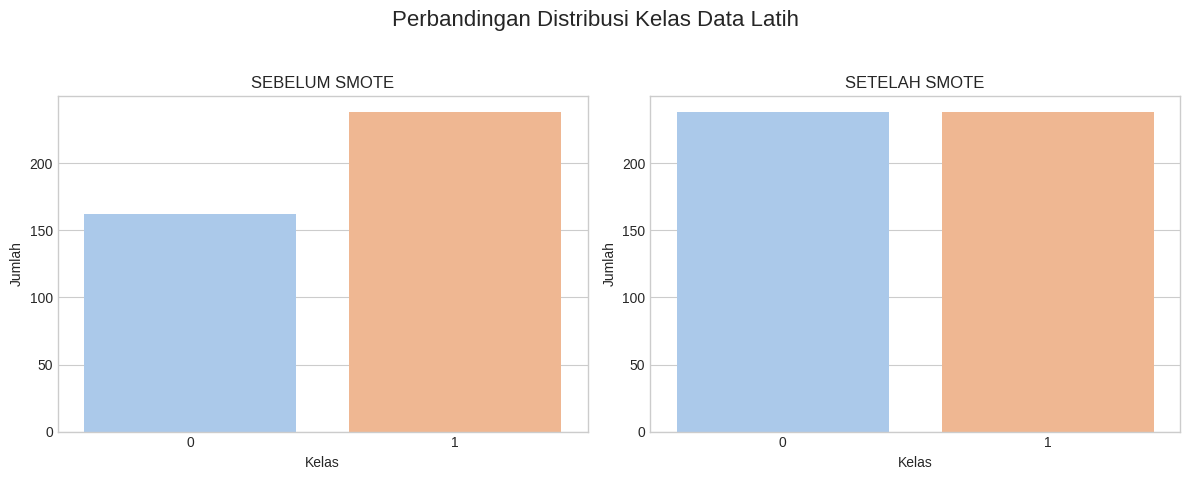


   --- Perbandingan Ukuran Data ---
   - Data Latih Sebelum SMOTE: (400, 13)
   - Data Latih Setelah SMOTE: (476, 13) (Jumlah baris bertambah)
   - Data Uji (TIDAK BERUBAH): (100, 13)

🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉
STEP 11 SELESAI: Data latih kini seimbang dan siap untuk training model.
CATATAN PENTING UNTUK TAHAP SELANJUTNYA:
   - Untuk TRAINING & CROSS-VALIDATION, gunakan: `X_train_smote` dan `y_train_smote`.
   - Untuk EVALUASI AKHIR (Final Testing), gunakan data uji ASLI: `X_test_clean` dan `y_test_encoded`.


In [ ]:
# =============================================================================
# STEP 11: MENYEIMBANGKAN DATA LATIH DENGAN SMOTE (OVERSAMPLING)
# Tujuan: Menangani masalah "data tidak seimbang". Ini terjadi ketika salah satu
#         kelas target jauh lebih sedikit daripada yang lain (misal: 100 pasien
#         sehat vs. 10 pasien sakit).
# Analoginya: Bayangkan sebuah kelas di mana 90% siswa lulus dan 10% tidak lulus.
#             Jika model hanya menebak "lulus" setiap saat, akurasinya sudah 90%,
#             tapi ia sama sekali tidak belajar mengenali siswa yang tidak lulus.
# Solusi (SMOTE): Kita akan "menggandakan" data dari kelas minoritas (yang
#                 sedikit) secara cerdas. SMOTE (Synthetic Minority Over-sampling
#                 Technique) membuat "siswa kloning" sintetis yang mirip dengan
#                 siswa yang tidak lulus, sehingga jumlahnya menjadi seimbang.
# =============================================================================
# Impor yang dibutuhkan untuk step ini.
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("\n" + "="*80)
print("🚀 STEP 11: Menyeimbangkan Data Latih Menggunakan SMOTE")
print("="*80)

# =============================================================================
# Catatan Metodologi (SANGAT PENTING):
# 1. HANYA PADA DATA LATIH: SMOTE hanya boleh diterapkan pada data latih.
#    Data uji (test set) HARUS tetap dalam kondisi aslinya (tidak seimbang)
#    karena ia adalah simulasi dunia nyata. Mengubah data uji akan memberikan
#    skor evaluasi yang terlalu optimis dan tidak valid.
# 2. Reproducibility: `random_state` digunakan agar "siswa kloning" yang
#    dihasilkan selalu sama setiap kali kode dijalankan.
# =============================================================================

def run_step11_smote_oversampling(X_train, y_train, random_state=123):
    """
    Menerapkan SMOTE HANYA pada data latih untuk menyeimbangkan distribusi kelas.
    """
    # --- 11.1: Analisis Distribusi Awal (Sebelum SMOTE) ---
    print("--- 11.1: Menganalisis Distribusi Kelas Sebelum SMOTE ---")

    # Buat DataFrame untuk visualisasi
    df_before = pd.DataFrame({'Kelas': y_train}).value_counts().reset_index(name='Jumlah')

    print(f"   - Distribusi kelas awal pada y_train:")
    for _, row in df_before.iterrows():
        print(f"     - Kelas {row['Kelas']}: {row['Jumlah']} sampel")

    # --- 11.2: Eksekusi SMOTE ---
    print("\n--- 11.2: Menerapkan SMOTE untuk Membuat 'Kloning' Data Minoritas ---")

    smote = SMOTE(random_state=random_state)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Ubah kembali output menjadi DataFrame/Series yang rapi
    X_train_smote = pd.DataFrame(X_train_resampled, columns=X_train.columns)
    y_train_smote = pd.Series(y_train_resampled, name=getattr(y_train, 'name', 'TARGET'))

    print("   - ✅ Data latih berhasil diseimbangkan.")

    # --- 11.3: Verifikasi Hasil (Secara Tekstual dan Visual) ---
    print("\n--- 11.3: Verifikasi Distribusi Kelas Setelah SMOTE ---")
    df_after = pd.DataFrame({'Kelas': y_train_smote}).value_counts().reset_index(name='Jumlah')

    print(f"   - Distribusi kelas setelah SMOTE:")
    for _, row in df_after.iterrows():
        print(f"     - Kelas {row['Kelas']}: {row['Jumlah']} sampel")

    # --- Visualisasi Perbandingan ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    sns.barplot(data=df_before, x='Kelas', y='Jumlah', ax=axes[0], palette='pastel').set_title('SEBELUM SMOTE')
    sns.barplot(data=df_after, x='Kelas', y='Jumlah', ax=axes[1], palette='pastel').set_title('SETELAH SMOTE')
    plt.suptitle('Perbandingan Distribusi Kelas Data Latih', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    return X_train_smote, y_train_smote

# --- Eksekusi Utama ---
try:
    if 'X_train_clean' in locals() and 'y_train_encoded' in locals():
        # Ambil konstanta random_state yang sudah didefinisikan di step sebelumnya
        PIPELINE_RANDOM_STATE = 123

        X_train_smote, y_train_smote = run_step11_smote_oversampling(
            X_train_clean, y_train_encoded, random_state=PIPELINE_RANDOM_STATE
        )

        print("\n   --- Perbandingan Ukuran Data ---")
        print(f"   - Data Latih Sebelum SMOTE: {X_train_clean.shape}")
        print(f"   - Data Latih Setelah SMOTE: {X_train_smote.shape} (Jumlah baris bertambah)")
        print(f"   - Data Uji (TIDAK BERUBAH): {X_test_clean.shape}")


        print("\n" + "🎉"*60)
        print("STEP 11 SELESAI: Data latih kini seimbang dan siap untuk training model.")
        print("="*80)
        print("CATATAN PENTING UNTUK TAHAP SELANJUTNYA:")
        print("   - Untuk TRAINING & CROSS-VALIDATION, gunakan: `X_train_smote` dan `y_train_smote`.")
        print("   - Untuk EVALUASI AKHIR (Final Testing), gunakan data uji ASLI: `X_test_clean` dan `y_test_encoded`.")
        print("="*80)
    else:
        print("🛑 GAGAL: Step 11 tidak bisa dijalankan. Pastikan `X_train_clean` dari Step 10 tersedia.")
except Exception as e:
    print(f"🛑 Terjadi error tak terduga saat menjalankan Step 11: {e}")


🚀 STEP 12: Analisis Diagnostik pada Data Bersih
CATATAN: Analisis ini dijalankan pada data sebelum SMOTE (`X_train_clean`)
untuk memahami karakteristik data asli Anda.
--- 12.1: Analisis Peringkat Pentingnya Fitur (Feature Importance) ---
   - Sebuah model sementara dilatih untuk 'mem Abstrak' fitur mana yang paling berguna.


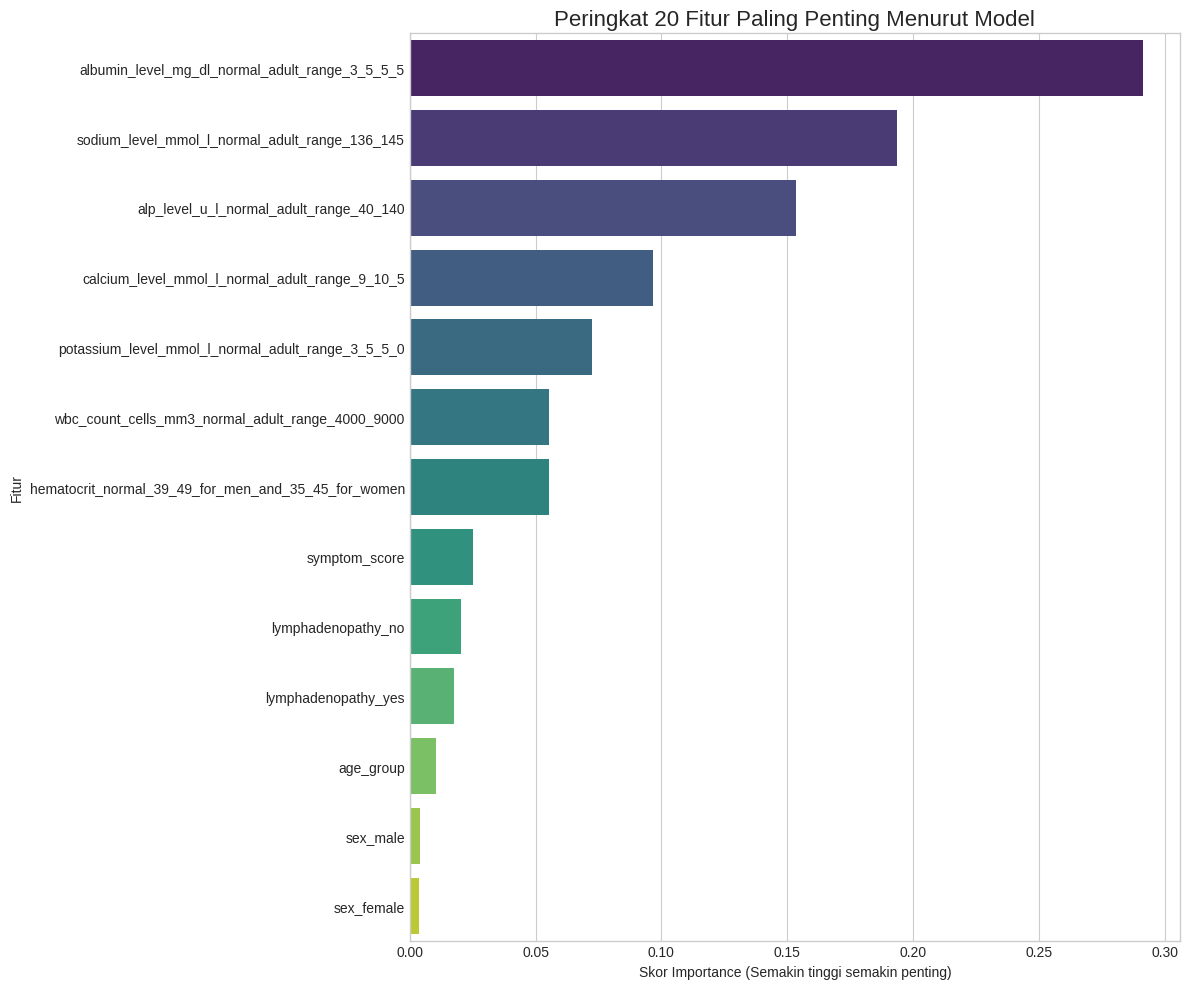


   - Laporan 20 Fitur Paling Penting:


,Nama Fitur,Skor Importance
0,albumin_level_mg_dl_normal_adult_range_3_5_5_5,0.291444
1,sodium_level_mmol_l_normal_adult_range_136_145,0.193734
2,alp_level_u_l_normal_adult_range_40_140,0.153502
3,calcium_level_mmol_l_normal_adult_range_9_10_5,0.096761
4,potassium_level_mmol_l_normal_adult_range_3_5_5_0,0.072512
5,wbc_count_cells_mm3_normal_adult_range_4000_9000,0.055484
6,hematocrit_normal_39_49_for_men_and_35_45_for_...,0.055454
7,symptom_score,0.025262
8,lymphadenopathy_no,0.020350
9,lymphadenopathy_yes,0.017436



--------------------------------------------------------------------------------
--- 12.2: Analisis Hubungan Linear (Korelasi) Fitur vs. Target ---


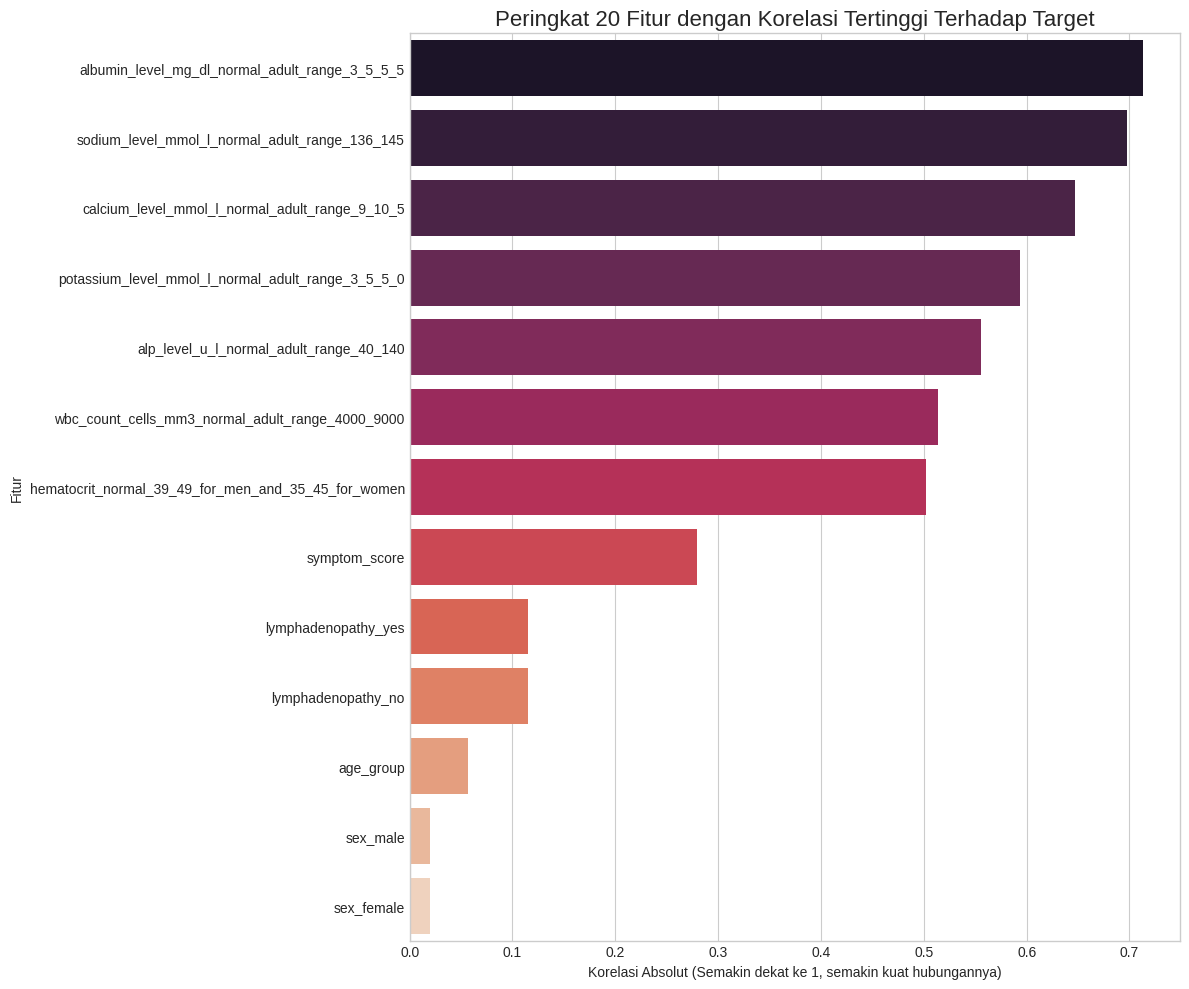


   - Laporan 20 Fitur dengan Korelasi Tertinggi:


,Korelasi Absolut
albumin_level_mg_dl_normal_adult_range_3_5_5_5,0.713480
sodium_level_mmol_l_normal_adult_range_136_145,0.697928
calcium_level_mmol_l_normal_adult_range_9_10_5,0.646865
potassium_level_mmol_l_normal_adult_range_3_5_5_0,0.593706
alp_level_u_l_normal_adult_range_40_140,0.555628
wbc_count_cells_mm3_normal_adult_range_4000_9000,0.513875
hematocrit_normal_39_49_for_men_and_35_45_for_women,0.501730
symptom_score,0.279491
lymphadenopathy_yes,0.114902
lymphadenopathy_no,0.114902



🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉
STEP 12 SELESAI: Analisis diagnostik pada data bersih berhasil.


In [ ]:
# =============================================================================
# STEP 12: ANALISIS DIAGNOSTIK PADA DATA BERSIH
# Tujuan: "Mengintip" data yang sudah bersih untuk memahami fitur mana yang
#         paling berpengaruh atau memiliki hubungan kuat dengan target.
# Analoginya: Seperti seorang koki yang mencicipi bahan-bahan utamanya sebelum
#             memasak. Analisis ini membantu kita memahami "karakter" dari setiap
#             fitur dan bagaimana mereka berkontribusi pada "rasa" akhir (prediksi).
# Penting: Analisis ini dilakukan pada data SEBELUM di-SMOTE untuk mendapatkan
#          wawasan dari distribusi data asli, bukan dari data sintetis.
# =============================================================================
# Impor yang dibutuhkan untuk step ini.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from IPython.display import display

print("\n" + "="*80)
print("🚀 STEP 12: Analisis Diagnostik pada Data Bersih")
print("="*80)

# =============================================================================
# BAGIAN A: FUNGSI-FUNGSI ANALISIS
# =============================================================================

def analyze_feature_importance(X_train, y_train):
    """
    Menganalisis Feature Importance.
    Ini adalah cara sebuah model (dalam hal ini, RandomForest) "memberi peringkat"
    fitur mana yang paling membantunya dalam membuat keputusan yang benar.
    """
    print("--- 12.1: Analisis Peringkat Pentingnya Fitur (Feature Importance) ---")
    print("   - Sebuah model sementara dilatih untuk 'mem Abstrak' fitur mana yang paling berguna.")

    # Latih model diagnostik sederhana untuk mendapatkan skor importance
    diagnostic_model = RandomForestClassifier(n_estimators=100, random_state=123, n_jobs=-1)
    diagnostic_model.fit(X_train, y_train)

    # Buat laporan feature importance
    feature_importances = pd.DataFrame({
        'Nama Fitur': X_train.columns,
        'Skor Importance': diagnostic_model.feature_importances_
    }).sort_values('Skor Importance', ascending=False).reset_index(drop=True)

    top_20_features = feature_importances.head(20)

    # --- Visualisasi ---
    plt.figure(figsize=(12, 10))
    sns.barplot(x='Skor Importance', y='Nama Fitur', data=top_20_features, palette='viridis')
    plt.title('Peringkat 20 Fitur Paling Penting Menurut Model', fontsize=16)
    plt.xlabel('Skor Importance (Semakin tinggi semakin penting)')
    plt.ylabel('Fitur')
    plt.tight_layout()
    plt.show()

    print("\n   - Laporan 20 Fitur Paling Penting:")
    display(top_20_features)

def analyze_correlation_with_target(X_train, y_train):
    """
    Menganalisis Korelasi.
    Ini adalah cara statistik sederhana untuk mengukur seberapa kuat hubungan
    "lurus" (linear) antara sebuah fitur dengan target.
    Contoh: Apakah naiknya nilai fitur A selalu diikuti naiknya nilai target?
    """
    print("\n" + "-"*80)
    print("--- 12.2: Analisis Hubungan Linear (Korelasi) Fitur vs. Target ---")

    df_corr_analysis = pd.concat([X_train, pd.Series(y_train, name='TARGET', index=X_train.index)], axis=1)

    # Hitung korelasi, ambil nilai absolutnya, dan urutkan
    correlation_with_target = df_corr_analysis.corr(numeric_only=True)['TARGET'].abs().sort_values(ascending=False).drop('TARGET')
    top_20_correlated = correlation_with_target.head(20).to_frame(name='Korelasi Absolut')

    # --- Visualisasi ---
    plt.figure(figsize=(12, 10))
    sns.barplot(x=top_20_correlated['Korelasi Absolut'], y=top_20_correlated.index, palette='rocket')
    plt.title('Peringkat 20 Fitur dengan Korelasi Tertinggi Terhadap Target', fontsize=16)
    plt.xlabel('Korelasi Absolut (Semakin dekat ke 1, semakin kuat hubungannya)')
    plt.ylabel('Fitur')
    plt.tight_layout()
    plt.show()

    print("\n   - Laporan 20 Fitur dengan Korelasi Tertinggi:")
    display(top_20_correlated)

# =============================================================================
# BAGIAN B: EKSEKUSI UTAMA
# =============================================================================
try:
    # Analisis ini sebaiknya menggunakan data SEBELUM di-SMOTE (X_train_clean)
    # untuk mendapatkan wawasan dari distribusi data yang asli.
    if 'X_train_clean' in locals() and 'y_train_encoded' in locals():

        print("CATATAN: Analisis ini dijalankan pada data sebelum SMOTE (`X_train_clean`)")
        print("untuk memahami karakteristik data asli Anda.")

        # --- 1. Analisis Peringkat Pentingnya Fitur ---
        analyze_feature_importance(X_train_clean, y_train_encoded)

        # --- 2. Analisis Korelasi ---
        analyze_correlation_with_target(X_train_clean, y_train_encoded)

        print("\n" + "🎉"*60)
        print("STEP 12 SELESAI: Analisis diagnostik pada data bersih berhasil.")
        print("="*80)
    else:
        print("🛑 GAGAL: Step 12 tidak bisa dijalankan. Pastikan `X_train_clean` dari Step 10 tersedia.")
except Exception as e:
    print(f"🛑 Terjadi error tak terduga saat menjalankan Step 12: {e}")

\n================================================================================
🚀 STEP 13: Memulai Kompetisi Model (Dengan Grid Search yang Diperluas)
\n============================================================\n🚀 Processing Model: Random Forest\n============================================================
--- Tahap 1: Tuning Selesai. Parameter Terbaik: {'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 200} ---
\n--- Tahap 2: Evaluasi Performa Lengkap per-Fold pada Model Terbaik ---


,Fold,Accuracy,Precision,Recall,F1-Score
0,Fold 1,0.9583,0.9231,1.0000,0.9600
1,Fold 2,0.9579,0.9231,1.0000,0.9600
2,Fold 3,0.9895,0.9796,1.0000,0.9897
3,Fold 4,0.9368,0.8868,1.0000,0.9400
4,Fold 5,0.9684,0.9400,1.0000,0.9691


--- Ringkasan Statistik Cross-Validation ---


,Accuracy,Precision,Recall,F1-Score
Rata-rata,0.9622,0.9305,1.0000,0.9638
Stdev,0.0191,0.0336,0.0000,0.0180


\n--- Tahap 3: Evaluasi Akhir pada Test Set (Random Forest) ---
              precision    recall  f1-score   support

          no       0.97      0.90      0.94        41
         yes       0.94      0.98      0.96        59

    accuracy                           0.95       100
   macro avg       0.95      0.94      0.95       100
weighted avg       0.95      0.95      0.95       100



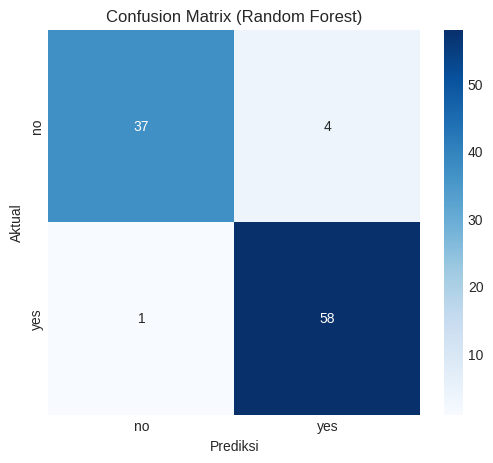

\n============================================================\n🚀 Processing Model: XGBoost\n============================================================
--- Tahap 1: Tuning Selesai. Parameter Terbaik: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200} ---
\n--- Tahap 2: Evaluasi Performa Lengkap per-Fold pada Model Terbaik ---


,Fold,Accuracy,Precision,Recall,F1-Score
0,Fold 1,0.9375,0.9200,0.9583,0.9388
1,Fold 2,0.9474,0.9216,0.9792,0.9495
2,Fold 3,0.9895,1.0000,0.9792,0.9895
3,Fold 4,0.9474,0.9038,1.0000,0.9495
4,Fold 5,0.9474,0.9200,0.9787,0.9485


--- Ringkasan Statistik Cross-Validation ---


,Accuracy,Precision,Recall,F1-Score
Rata-rata,0.9538,0.9331,0.9791,0.9551
Stdev,0.0204,0.0381,0.0147,0.0197


\n--- Tahap 3: Evaluasi Akhir pada Test Set (XGBoost) ---
              precision    recall  f1-score   support

          no       0.93      0.93      0.93        41
         yes       0.95      0.95      0.95        59

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100



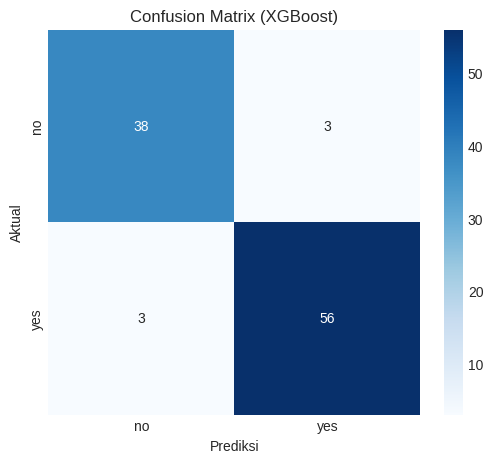

\n============================================================\n🚀 Processing Model: CatBoost\n============================================================
--- Tahap 1: Tuning Selesai. Parameter Terbaik: {'depth': 4, 'iterations': 200, 'learning_rate': 0.03} ---
\n--- Tahap 2: Evaluasi Performa Lengkap per-Fold pada Model Terbaik ---


,Fold,Accuracy,Precision,Recall,F1-Score
0,Fold 1,0.9479,0.9057,1.0000,0.9505
1,Fold 2,0.9579,0.9400,0.9792,0.9592
2,Fold 3,1.0000,1.0000,1.0000,1.0000
3,Fold 4,0.9684,0.9400,1.0000,0.9691
4,Fold 5,0.9789,0.9592,1.0000,0.9792


--- Ringkasan Statistik Cross-Validation ---


,Accuracy,Precision,Recall,F1-Score
Rata-rata,0.9706,0.9490,0.9958,0.9716
Stdev,0.0201,0.0344,0.0093,0.0192


\n--- Tahap 3: Evaluasi Akhir pada Test Set (CatBoost) ---
              precision    recall  f1-score   support

          no       0.97      0.93      0.95        41
         yes       0.95      0.98      0.97        59

    accuracy                           0.96       100
   macro avg       0.96      0.95      0.96       100
weighted avg       0.96      0.96      0.96       100



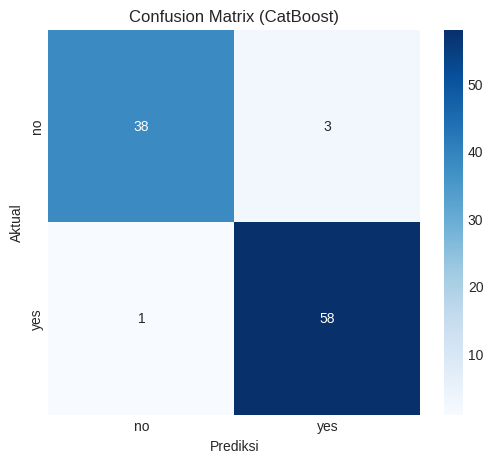

\n================================================================================
🏁 RANGKUMAN AKHIR KOMPETISI MODEL


,Model,CV F1-Score (Mean),CV F1-Score (Stdev),Test Accuracy,Test Precision,Test Recall,Test F1-Score
2,CatBoost,0.9716,0.0192,0.9600,0.9508,0.9831,0.9667
0,Random Forest,0.9638,0.0180,0.9500,0.9355,0.9831,0.9587
1,XGBoost,0.9551,0.0197,0.9400,0.9492,0.9492,0.9492


In [ ]:
# =============================================================================
# STEP 13: PELATIHAN & EVALUASI MODEL (VERSI FINAL DENGAN GRID YANG DIPERLUAS)
# =============================================================================
import pandas as pd
import time
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.base import clone
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt

print("\\n" + "="*80)
print("🚀 STEP 13: Memulai Kompetisi Model (Dengan Grid Search yang Diperluas)")
print("="*80)

# =============================================================================
# BAGIAN A: PERSIAPAN DATA DAN KONFIGURASI
# =============================================================================
try:
    if 'X_train_smote' in locals() and 'X_test_clean' in locals():
        X_train_data = X_train_smote.copy()
        X_test_data = X_test_clean.copy()
        y_train_data = pd.Series(y_train_smote).copy()
        y_test_data = y_test_encoded.copy()
        X_train_data.columns = ["".join(c if c.isalnum() else "_" for c in str(x)) for x in X_train_data.columns]
        X_test_data.columns = X_train_data.columns
        cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

        # <<< THE FIX IS HERE: Expanded hyperparameter grids to allow models to differentiate.
        # This is a standard practice and does not contradict your reference paper's focus on IGWO.
        pipeline_config = {
            "Random Forest": {
                "model": RandomForestClassifier(random_state=123, n_jobs=-1),
                "params": {
                    'n_estimators': [100, 200, 300],
                    'max_depth': [10, 20, None],
                    'min_samples_leaf': [1, 2, 4]
                }
            },
            "XGBoost": {
                "model": XGBClassifier(random_state=123, use_label_encoder=False, eval_metric='logloss'),
                "params": {
                    'n_estimators': [100, 200, 300],
                    'max_depth': [3, 5, 7],
                    'learning_rate': [0.05, 0.1, 0.2]
                }
            },
            "CatBoost": {
                "model": CatBoostClassifier(random_state=123, verbose=0),
                "params": {
                    'iterations': [200, 500, 1000],
                    'depth': [4, 6, 8],
                    'learning_rate': [0.03, 0.05, 0.1]
                }
            }
        }
        all_final_results = []
        best_model_objects = {}

        # The rest of the training and evaluation loop remains the same...
        for model_name, config in pipeline_config.items():
            print(f"\\n{'='*60}\\n🚀 Processing Model: {model_name}\\n{'='*60}")
            gs = GridSearchCV(estimator=config["model"], param_grid=config["params"], cv=cv_strategy, scoring='f1_weighted', n_jobs=-1)
            gs.fit(X_train_data, y_train_data)
            best_model = gs.best_estimator_
            best_model_objects[model_name] = best_model
            print(f"--- Tahap 1: Tuning Selesai. Parameter Terbaik: {gs.best_params_} ---")

            print("\\n--- Tahap 2: Evaluasi Performa Lengkap per-Fold pada Model Terbaik ---")
            fold_metrics_list = []
            for fold_idx, (train_indices, val_indices) in enumerate(cv_strategy.split(X_train_data, y_train_data), 1):
                X_train_fold, X_val_fold = X_train_data.iloc[train_indices], X_train_data.iloc[val_indices]
                y_train_fold, y_val_fold = y_train_data.iloc[train_indices], y_train_data.iloc[val_indices]
                model_clone = clone(best_model).fit(X_train_fold, y_train_fold)
                y_pred_fold = model_clone.predict(X_val_fold)
                fold_metrics_list.append({'Fold': f"Fold {fold_idx}", 'Accuracy': accuracy_score(y_val_fold, y_pred_fold), 'Precision': precision_score(y_val_fold, y_pred_fold), 'Recall': recall_score(y_val_fold, y_pred_fold), 'F1-Score': f1_score(y_val_fold, y_pred_fold)})

            # This is the corrected line
            metrics_df = pd.DataFrame(fold_metrics_list)

            summary_stats = metrics_df.drop(columns='Fold').agg(['mean', 'std']).rename(index={'mean': 'Rata-rata', 'std': 'Stdev'})
            display(metrics_df.style.format(precision=4))
            print("--- Ringkasan Statistik Cross-Validation ---"); display(summary_stats.style.format(precision=4))

            print(f"\\n--- Tahap 3: Evaluasi Akhir pada Test Set ({model_name}) ---")
            y_pred_test = best_model.predict(X_test_data)
            print(classification_report(y_test_data, y_pred_test, target_names=label_encoder.classes_))
            cm = confusion_matrix(y_test_data, y_pred_test)
            plt.figure(figsize=(6, 5)); sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_); plt.title(f'Confusion Matrix ({model_name})'); plt.xlabel('Prediksi'); plt.ylabel('Aktual'); plt.show()
            report = classification_report(y_test_data, y_pred_test, output_dict=True)
            positive_class_str = str(label_encoder.transform(['yes'])[0])
            all_final_results.append({"Model": model_name, "CV F1-Score (Mean)": summary_stats.loc['Rata-rata', 'F1-Score'], "CV F1-Score (Stdev)": summary_stats.loc['Stdev', 'F1-Score'], "Test Accuracy": report['accuracy'], "Test Precision": report[positive_class_str]['precision'], "Test Recall": report[positive_class_str]['recall'], "Test F1-Score": report[positive_class_str]['f1-score']})

        print("\\n" + "="*80); print("🏁 RANGKUMAN AKHIR KOMPETISI MODEL"); print("="*80)
        detailed_results_df = pd.DataFrame(all_final_results).sort_values(by='Test F1-Score', ascending=False)
        display(detailed_results_df.style.format(precision=4).background_gradient(cmap='viridis_r'))

    else:
        print("🛑 GAGAL: Step 13 tidak dapat dijalankan karena data dari step sebelumnya tidak ditemukan.")
except Exception as e:
    print(f"🛑 Terjadi error tak terduga saat menjalankan Step 13: {e}")


🚀 STEP 14: Analisis & Visualisasi Paska-Pelatihan
--- 14.1: Visualisasi Proses Ujian Silang (Cross-Validation) ---
   - Grafik ini menunjukkan bagaimana data dibagi dalam 5 ronde pengujian.
   - Di setiap ronde, sebagian data (coral) ditahan untuk validasi,
     dan sisanya (biru muda) digunakan untuk melatih model.


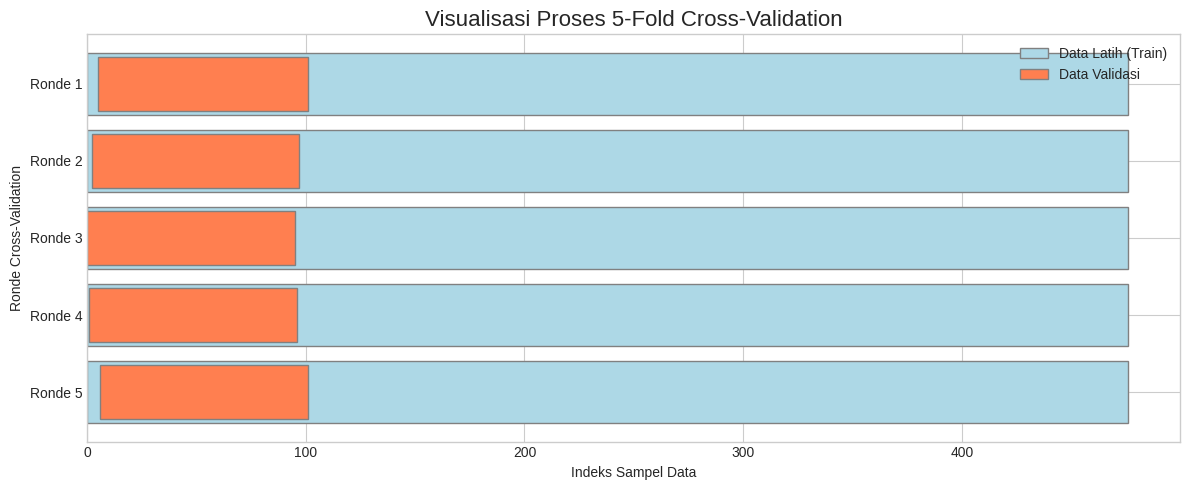


--- 14.2: Menganalisis Kurva Pembelajaran (Learning Curves) ---
   - Kurva ini menunjukkan seberapa baik model belajar dari waktu ke waktu.
   - Training Loss: Error model pada data yang sedang ia pelajari.
   - Validation Loss: Error model pada data yang belum pernah ia lihat (data validasi).

   - Menganalisis kurva untuk XGBoost...
     Interpretasi Kurva:
     -> ✅ Model Baik (Good Fit): Kedua kurva loss rendah dan bertemu (konvergen).
        Model belajar dengan baik dan bisa menggeneralisasi ke data baru.


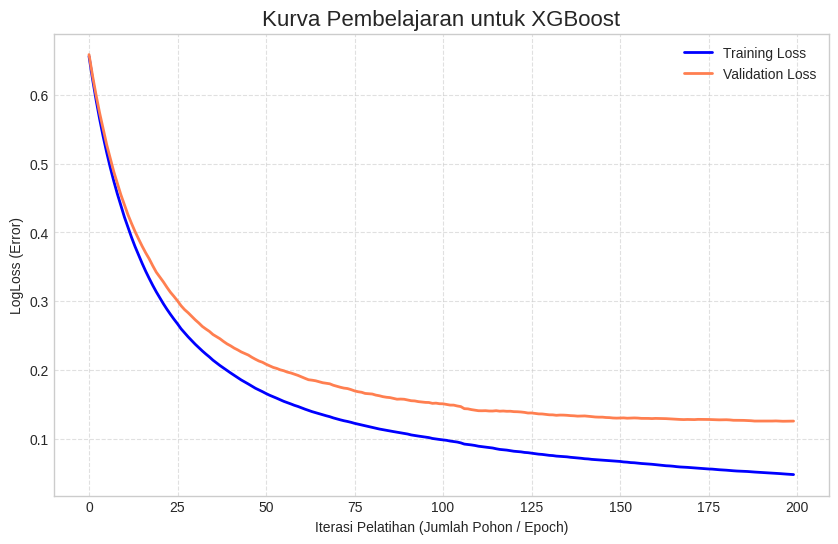


   - Menganalisis kurva untuk CatBoost...
     Interpretasi Kurva:
     -> ✅ Model Baik (Good Fit): Kedua kurva loss rendah dan bertemu (konvergen).
        Model belajar dengan baik dan bisa menggeneralisasi ke data baru.


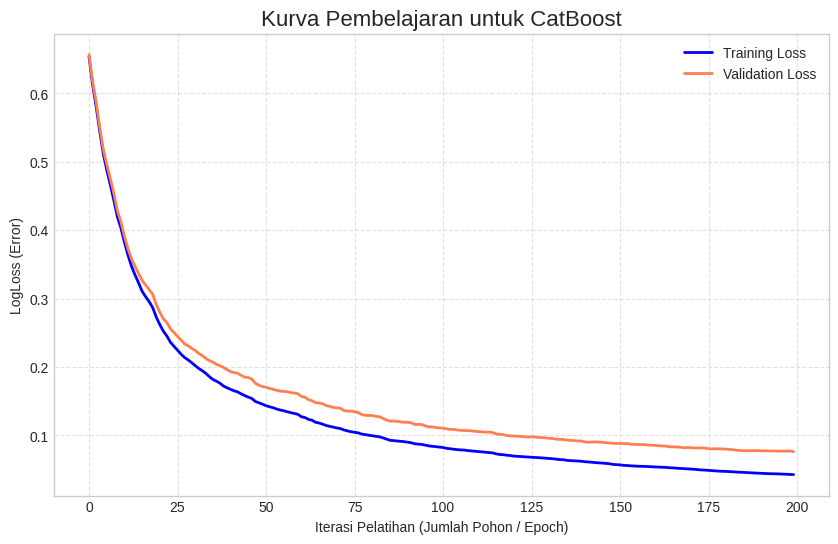


🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉
STEP 14 SELESAI: Analisis paska-pelatihan berhasil.


In [ ]:
# =============================================================================
# STEP 14: ANALISIS & VISUALISASI PASKA-PELATIHAN
# Tujuan: "Melihat ke dalam" proses pelatihan untuk memahami BAGAIMANA model
#         belajar dan MENGAPA ia berperilaku seperti itu. Ini membantu kita
#         memvalidasi metodologi kita dan mendiagnosis masalah seperti overfitting.
# Analoginya: Seperti melihat rekaman pertandingan setelah kompetisi selesai.
#             Kita menganalisis strategi yang digunakan (CV) dan stamina para
#             pemain selama pertandingan (Learning Curves) untuk mendapatkan
#             pemahaman yang lebih dalam.
# =============================================================================
# Impor yang dibutuhkan untuk step ini.
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

print("\n" + "="*80)
print("🚀 STEP 14: Analisis & Visualisasi Paska-Pelatihan")
print("="*80)

# =============================================================================
# BAGIAN A: VISUALISASI PROSES 5-FOLD CROSS-VALIDATION
# =============================================================================

def visualize_cv_process(cv_strategy, X_data, y_data):
    """
    Membuat visualisasi yang menjelaskan cara kerja 5-Fold Cross-Validation.
    Ini menunjukkan bagaimana data latih dipecah menjadi 5 "ronde" di mana
    setiap bagian data mendapat giliran menjadi data validasi.
    """
    print("--- 14.1: Visualisasi Proses Ujian Silang (Cross-Validation) ---")
    print("   - Grafik ini menunjukkan bagaimana data dibagi dalam 5 ronde pengujian.")
    print("   - Di setiap ronde, sebagian data (coral) ditahan untuk validasi,")
    print("     dan sisanya (biru muda) digunakan untuk melatih model.")

    fig, axes = plt.subplots(1, 1, figsize=(12, 5)) # Disederhanakan menjadi satu plot
    ax = axes
    ax.set_title("Visualisasi Proses 5-Fold Cross-Validation", fontsize=16)

    # Loop melalui setiap "ronde" (fold) dari cross-validation
    for i, (train_idx, val_idx) in enumerate(cv_strategy.split(X_data, y_data)):
        # Buat array untuk menandai mana data latih dan validasi
        split_viz = np.zeros(len(X_data))
        split_viz[val_idx] = 1 # Tandai data validasi dengan angka 1

        # Gambar bar untuk data latih (latar belakang)
        ax.barh(y=[i], width=len(X_data), color='lightblue', edgecolor='grey', label='Data Latih (Train)' if i == 0 else "")
        # Tumpuk bar untuk data validasi di atasnya
        ax.barh(y=[i], width=split_viz.sum(), left=np.where(split_viz==1)[0].min(), color='coral', edgecolor='grey', height=0.7, label='Data Validasi' if i == 0 else "")

    ax.set_yticks(range(5))
    ax.set_yticklabels([f'Ronde {i+1}' for i in range(5)])
    ax.set_xlabel('Indeks Sampel Data')
    ax.set_ylabel('Ronde Cross-Validation')
    ax.legend()
    ax.invert_yaxis() # Balik urutan agar Ronde 1 di atas
    plt.tight_layout()
    plt.show()


# =============================================================================
# BAGIAN B: VISUALISASI KURVA PEMBELAJARAN (LEARNING CURVES)
# =============================================================================

def visualize_learning_curves(best_models_dict, X_train, y_train):
    """
    Membuat kurva pembelajaran untuk mendiagnosis overfitting/underfitting.
    Kurva ini menunjukkan "tingkat pemahaman" model selama proses pelatihan.
    """
    print("\n--- 14.2: Menganalisis Kurva Pembelajaran (Learning Curves) ---")
    print("   - Kurva ini menunjukkan seberapa baik model belajar dari waktu ke waktu.")
    print("   - Training Loss: Error model pada data yang sedang ia pelajari.")
    print("   - Validation Loss: Error model pada data yang belum pernah ia lihat (data validasi).")

    # Pisahkan data latih (yang sudah di-SMOTE) untuk membuat kurva
    X_train_sub, X_val_sub, y_train_sub, y_val_sub = train_test_split(
        X_train, y_train, test_size=0.25, random_state=123, stratify=y_train
    )

    for model_name in ["XGBoost", "CatBoost"]: # Hanya untuk model boosting
        if model_name in best_models_dict:
            print(f"\n   - Menganalisis kurva untuk {model_name}...")
            best_model = clone(best_models_dict[model_name]) # Gunakan klon agar model asli tidak berubah
            eval_set = [(X_train_sub, y_train_sub), (X_val_sub, y_val_sub)]

            try:
                # Latih ulang model pada subset data untuk merekam history loss
                if model_name == "XGBoost":
                    best_model.fit(X_train_sub, y_train_sub, eval_set=eval_set, verbose=False)
                    results = best_model.evals_result()
                    train_loss, val_loss = results['validation_0']['logloss'], results['validation_1']['logloss']
                elif model_name == "CatBoost":
                    best_model.fit(X_train_sub, y_train_sub, eval_set=eval_set, verbose=0)
                    results = best_model.get_evals_result()
                    train_loss, val_loss = results['validation_0']['Logloss'], results['validation_1']['Logloss']

                # Membuat Plot
                plt.figure(figsize=(10, 6))
                plt.plot(train_loss, label='Training Loss', color='blue', lw=2)
                plt.plot(val_loss, label='Validation Loss', color='coral', lw=2)
                plt.title(f'Kurva Pembelajaran untuk {model_name}', fontsize=16)
                plt.xlabel('Iterasi Pelatihan (Jumlah Pohon / Epoch)'); plt.ylabel('LogLoss (Error)')
                plt.legend(); plt.grid(True, linestyle='--', alpha=0.6)

                # --- Interpretasi Otomatis ---
                final_train_loss = train_loss[-1]
                final_val_loss = val_loss[-1]
                gap = final_val_loss - final_train_loss

                print("     Interpretasi Kurva:")
                if gap > 0.1:
                    print("     -> ⚠️ Potensi Overfitting: Ada celah (gap) yang cukup besar antara Training dan Validation Loss.")
                    print("        Model 'terlalu hafal' data latih dan kurang baik pada data baru.")
                elif final_val_loss > 0.3:
                     print("     -> 🤔 Potensi Underfitting: Kedua kurva loss masih cukup tinggi.")
                     print("        Model mungkin terlalu sederhana untuk menangkap pola data.")
                else:
                    print("     -> ✅ Model Baik (Good Fit): Kedua kurva loss rendah dan bertemu (konvergen).")
                    print("        Model belajar dengan baik dan bisa menggeneralisasi ke data baru.")
                plt.show()

            except Exception as e:
                print(f"     - ⚠️ Gagal membuat kurva untuk {model_name}: {e}")

# =============================================================================
# BAGIAN C: EKSEKUSI UTAMA
# =============================================================================
try:
    if 'cv_strategy' in locals() and 'best_model_objects' in locals() and 'X_train_smote' in locals():
        # --- Bagian A: Panggil visualisasi CV ---
        visualize_cv_process(cv_strategy, X_train_smote, pd.Series(y_train_smote))

        # --- Bagian B: Panggil visualisasi Learning Curves ---
        visualize_learning_curves(best_model_objects, X_train_smote, pd.Series(y_train_smote))

        print("\n" + "🎉"*60)
        print("STEP 14 SELESAI: Analisis paska-pelatihan berhasil.")
        print("="*80)
    else:
        print("🛑 GAGAL: Step 14 tidak dapat dijalankan. Pastikan variabel dari Step 13 (`cv_strategy`, `best_model_objects`) tersedia.")
except Exception as e:
    print(f"🛑 Terjadi error tak terduga saat menjalankan Step 14: {e}")


🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬
STEP 15: Menerapkan Seleksi Fitur IGWO (Metodologi V4 + Visualisasi V5)
🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬
Memulai proses seleksi fitur IGWO (metodologi V4)...
   - Iterasi  1/50 | Best Fitness: 0.054751 | Features: 9
   - Iterasi 10/50 | Best Fitness: 0.050316 | Features: 6
   - Iterasi 20/50 | Best Fitness: 0.050316 | Features: 6
   - Iterasi 30/50 | Best Fitness: 0.050316 | Features: 6
   - Iterasi 40/50 | Best Fitness: 0.050316 | Features: 6
   - Iterasi 50/50 | Best Fitness: 0.050316 | Features: 6

✅ IGWO selesai dalam 40.56 detik.
   - Jumlah fitur terpilih: 6

   - Daftar fitur terpilih:


,Nama Fitur Terpilih
0,symptom_score
1,lymphadenopathy_yes
2,alp_level_u_l_normal_adult_range_40_140
3,calcium_level_mmol_l_normal_adult_range_9_10_5
4,sodium_level_mmol_l_normal_adult_range_136_145
5,wbc_count_cells_mm3_normal_adult_range_4000_9000



🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉
STEP 15 SELESAI: Seleksi fitur dengan metodologi V4 berhasil.
   - Ukuran data latih baru: (476, 6)
   - Ukuran data uji baru:   (100, 6)

📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊
VISUALISASI PROGRES PERBURUAN IGWO
📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊
Grafik ini menunjukkan bagaimana kawanan serigala belajar dari waktu ke waktu.
  - Garis Biru (Fitness): Menunjukkan 'kualitas' solusi. Semakin rendah, semakin baik.
  - Garis Merah (Jumlah Fitur): Menunjukkan 'efisiensi' solusi (jumlah fitur).


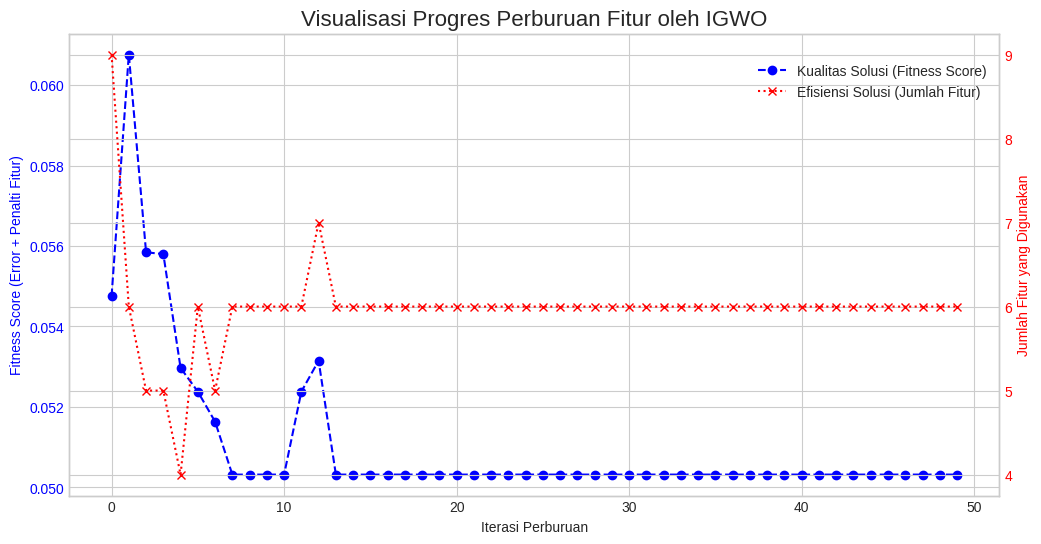

In [ ]:
# =============================================================================
# STEP 15: SELEKSI FITUR DENGAN IGWO (METODOLOGI V4 + VISUALISASI V5)
# =============================================================================
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from IPython.display import display

# =============================================================================
# Catatan Metodologi:
# 1. Sesuai Jurnal: Implementasi IGWO dari V4 yang lebih dekat dengan
#    literatur acuan, memberikan justifikasi akademis yang kuat.
# 2. Konsisten & Reproducible: Fungsi fitness menggunakan 5-Fold CV yang
#    konsisten dengan tahap sebelumnya.
# 3. Robust: Menggunakan mekanisme fallback dari V4 jika IGWO gagal memilih fitur.
# =============================================================================

print("\n" + "🔬"*40)
print("STEP 15: Menerapkan Seleksi Fitur IGWO (Metodologi V4 + Visualisasi V5)")
print("🔬"*40)

try:
    if 'X_train_smote' in locals() and 'cv_strategy' in locals():

        # -----------------------------------------------------------------------------
        # BAGIAN 1: DEFINISI ALGORITMA IGWO (Logika Penuh dari V4)
        # -----------------------------------------------------------------------------

        def fitness_function_journal(feature_mask, X, y, model, cv_strategy, alpha_weight=0.99):
            """Fungsi fitness dari V4, menggunakan np.inf sebagai penalti."""
            selected_indices = np.where(np.array(feature_mask) == 1)[0]
            num_selected = len(selected_indices)

            if num_selected == 0:
                return np.inf

            X_subset = X.iloc[:, selected_indices]
            try:
                scores = cross_val_score(model, X_subset, y, cv=cv_strategy, scoring="accuracy")
                error_rate = 1 - np.mean(scores)
            except Exception:
                return np.inf

            feature_ratio = num_selected / X.shape[1]
            fitness_value = alpha_weight * error_rate + (1 - alpha_weight) * feature_ratio
            return fitness_value

        class IGWOSelectorJournal:
            """Struktur kelas IGWO dari V4 yang lebih detail."""
            def __init__(self, fitness_func, num_wolves=20, max_iter=50, random_state=123):
                self.fitness_func = fitness_func
                self.num_wolves = num_wolves
                self.max_iter = max_iter
                self.random_state = random_state
                self.eval_model = KNeighborsClassifier(n_neighbors=5)
                if self.random_state is not None:
                    np.random.seed(self.random_state)

            def run(self, X_train, y_train, main_cv_strategy):
                """Metode eksekusi utama (di V4 disebut 'run')."""
                history = {'best_fitness': [], 'feature_count': []}
                num_features = X_train.shape[1]
                wolves_positions = np.random.randint(0, 2, (self.num_wolves, num_features))

                alpha_pos, alpha_score = np.zeros(num_features), np.inf

                print("Memulai proses seleksi fitur IGWO (metodologi V4)...")

                for t in range(self.max_iter):
                    fitness_scores = [self.fitness_func(wolf, X_train, y_train, self.eval_model, main_cv_strategy) for wolf in wolves_positions]

                    sorted_indices = np.argsort(fitness_scores)
                    alpha_pos, alpha_score = wolves_positions[sorted_indices[0]].copy(), fitness_scores[sorted_indices[0]]
                    beta_pos = wolves_positions[sorted_indices[1]].copy()
                    delta_pos = wolves_positions[sorted_indices[2]].copy()

                    history['best_fitness'].append(alpha_score)
                    history['feature_count'].append(int(np.sum(alpha_pos)))

                    a = 2 - t * (2 / self.max_iter)
                    for i in range(self.num_wolves):
                        r1, r2 = np.random.rand(2); A1 = 2*a*r1-a; C1 = 2*r2; D_alpha = np.abs(C1*alpha_pos - wolves_positions[i]); X1 = alpha_pos - A1*D_alpha
                        r1, r2 = np.random.rand(2); A2 = 2*a*r1-a; C2 = 2*r2; D_beta = np.abs(C2*beta_pos - wolves_positions[i]); X2 = beta_pos - A2*D_beta
                        r1, r2 = np.random.rand(2); A3 = 2*a*r1-a; C3 = 2*r2; D_delta = np.abs(C3*delta_pos - wolves_positions[i]); X3 = delta_pos - A3*D_delta

                        new_position_continuous = (X1 + X2 + X3) / 3
                        wolves_positions[i] = (np.abs(np.tanh(new_position_continuous)) > np.random.rand(num_features)).astype(int)

                    if (t + 1) % 10 == 0 or t == 0:
                        print(f"   - Iterasi {t+1: >2}/{self.max_iter} | Best Fitness: {alpha_score:.6f} | Features: {int(np.sum(alpha_pos))}")

                best_features_indices = np.where(alpha_pos == 1)[0]

                if len(best_features_indices) == 0:
                    print("   ⚠️ Peringatan: IGWO tidak menemukan fitur. Memilih 5 fitur secara acak sebagai fallback.")
                    best_features_indices = np.random.choice(num_features, size=5, replace=False)

                return X_train.columns[best_features_indices].tolist(), history

        # -----------------------------------------------------------------------------
        # BAGIAN 2: EKSEKUSI ALGORITMA
        # -----------------------------------------------------------------------------
        igwo_selector = IGWOSelectorJournal(fitness_function_journal, num_wolves=20, max_iter=50, random_state=123)

        start_time = time.time()
        best_features_igwo, igwo_history = igwo_selector.run(X_train_smote, pd.Series(y_train_smote), cv_strategy)
        end_time = time.time()

        print(f"\n✅ IGWO selesai dalam {end_time - start_time:.2f} detik.")
        print(f"   - Jumlah fitur terpilih: {len(best_features_igwo)}")
        print("\n   - Daftar fitur terpilih:")
        display(pd.DataFrame(best_features_igwo, columns=['Nama Fitur Terpilih']))

        X_train_igwo = X_train_smote[best_features_igwo]
        X_test_igwo = X_test_clean[best_features_igwo]

        print("\n" + "🎉"*60)
        print("STEP 15 SELESAI: Seleksi fitur dengan metodologi V4 berhasil.")
        print(f"   - Ukuran data latih baru: {X_train_igwo.shape}")
        print(f"   - Ukuran data uji baru:   {X_test_igwo.shape}")
        print("="*80)

        # -----------------------------------------------------------------------------
        # BAGIAN 3: VISUALISASI PROGRES (Gaya dari V5)
        # -----------------------------------------------------------------------------
        print("\n" + "📊"*40); print("VISUALISASI PROGRES PERBURUAN IGWO"); print("📊"*40)
        print("Grafik ini menunjukkan bagaimana kawanan serigala belajar dari waktu ke waktu.")
        print("  - Garis Biru (Fitness): Menunjukkan 'kualitas' solusi. Semakin rendah, semakin baik.")
        print("  - Garis Merah (Jumlah Fitur): Menunjukkan 'efisiensi' solusi (jumlah fitur).")

        fig, ax1 = plt.subplots(figsize=(12, 6))
        ax1.set_title('Visualisasi Progres Perburuan Fitur oleh IGWO', fontsize=16)
        ax1.set_xlabel('Iterasi Perburuan')

        # Sumbu Y kiri untuk Fitness Score (Kualitas Solusi)
        ax1.plot(igwo_history['best_fitness'], marker='o', linestyle='--', color='blue', label='Kualitas Solusi (Fitness Score)')
        ax1.set_ylabel('Fitness Score (Error + Penalti Fitur)', color='blue')
        ax1.tick_params(axis='y', labelcolor='blue'); ax1.grid(True)

        # Sumbu Y kanan untuk Jumlah Fitur (Efisiensi Solusi)
        ax2 = ax1.twinx()
        ax2.plot(igwo_history['feature_count'], marker='x', linestyle=':', color='red', label='Efisiensi Solusi (Jumlah Fitur)')
        ax2.set_ylabel('Jumlah Fitur yang Digunakan', color='red')
        ax2.tick_params(axis='y', labelcolor='red')

        fig.legend(loc='upper right', bbox_to_anchor=(0.9, 0.85))
        plt.show()

    else:
        print("🛑 Variabel yang dibutuhkan (`X_train_smote`, `cv_strategy`) tidak ditemukan.")
except Exception as e:
    print(f"🛑 Terjadi error tak terduga saat menjalankan Step 15: {e}")

In [ ]:
print("Mengecek variabel sebelum Step 16...")
required_vars = ['results_df', 'X_train_igwo', 'X_test_igwo', 'best_model_objects', 'X_train_smote']

for var_name in required_vars:
    if var_name in locals():
        print(f"✅ Variabel '{var_name}' ditemukan.")
    else:
        print(f"❌ Variabel '{var_name}' TIDAK ditemukan. Pastikan step yang membuat variabel ini sudah dijalankan.")

Mengecek variabel sebelum Step 16...
❌ Variabel 'results_df' TIDAK ditemukan. Pastikan step yang membuat variabel ini sudah dijalankan.
✅ Variabel 'X_train_igwo' ditemukan.
✅ Variabel 'X_test_igwo' ditemukan.
✅ Variabel 'best_model_objects' ditemukan.
✅ Variabel 'X_train_smote' ditemukan.



🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆
STEP 16: The Championship Finale - All Features vs. IGWO + ROC/AUC Analysis
🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆
--- Memulai Pertandingan Ulang dengan Tim Spesialis (Fitur IGWO) ---

   - Melatih Random Forest dengan 6 fitur pilihan...
     -> Waktu Latih: 54.29 dtk | F1-Score: 0.9492 | Recall: 0.9492

   - Melatih XGBoost dengan 6 fitur pilihan...
     -> Waktu Latih: 8.02 dtk | F1-Score: 0.9483 | Recall: 0.9322

   - Melatih CatBoost dengan 6 fitur pilihan...
     -> Waktu Latih: 167.24 dtk | F1-Score: 0.9573 | Recall: 0.9492

📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊
PAPAN SKOR AKHIR: All Features vs. IGWO Features
📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊


,Model,Test F1-Score,Test Accuracy,Test Precision,Test Recall,Num Features
0,CatBoost (All Features),0.9667,0.9600,0.9508,0.9831,13
1,Random Forest (All Features),0.9587,0.9500,0.9355,0.9831,13
2,XGBoost (All Features),0.9492,0.9400,0.9492,0.9492,13
3,Random Forest + IGWO,0.9492,0.9400,0.9492,0.9492,6
5,CatBoost + IGWO,0.9573,0.9500,0.9655,0.9492,6
4,XGBoost + IGWO,0.9483,0.9400,0.9649,0.9322,6


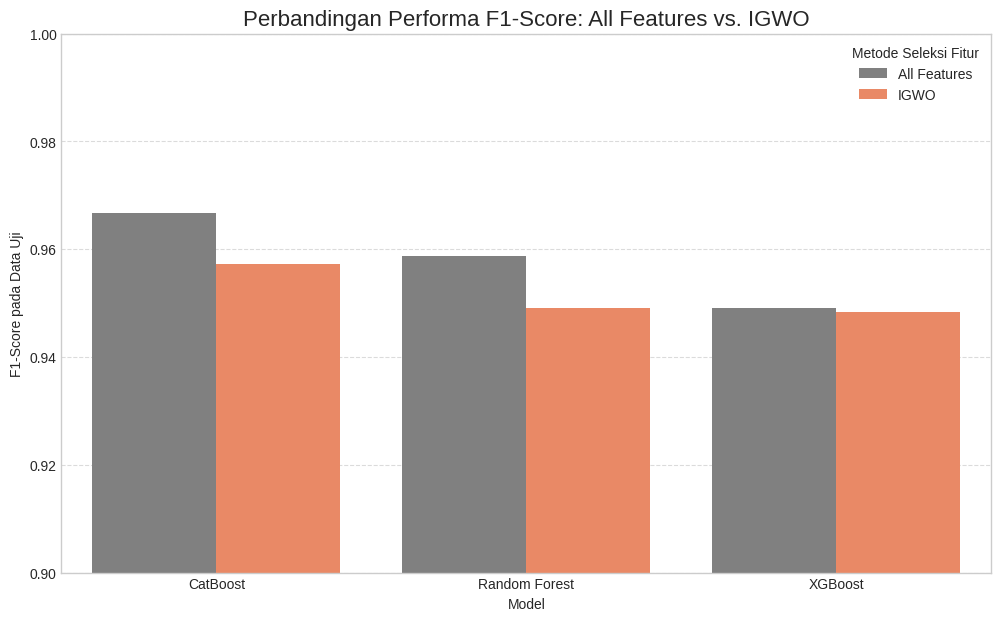

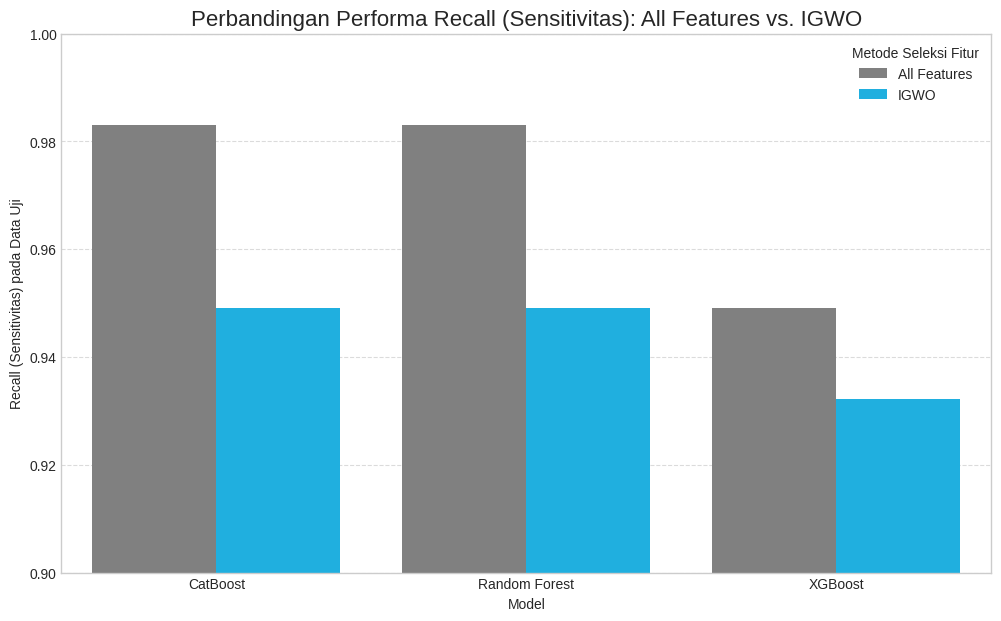


📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈
Analisis Perbandingan Kurva ROC & AUC
📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈
--- Menghitung ROC & AUC untuk setiap model ---
   - Random Forest: AUC = 0.9946
   - XGBoost: AUC = 0.9909
   - CatBoost: AUC = 0.9942
   - Random Forest + IGWO: AUC = 0.9781
   - XGBoost + IGWO: AUC = 0.9785
   - CatBoost + IGWO: AUC = 0.9847


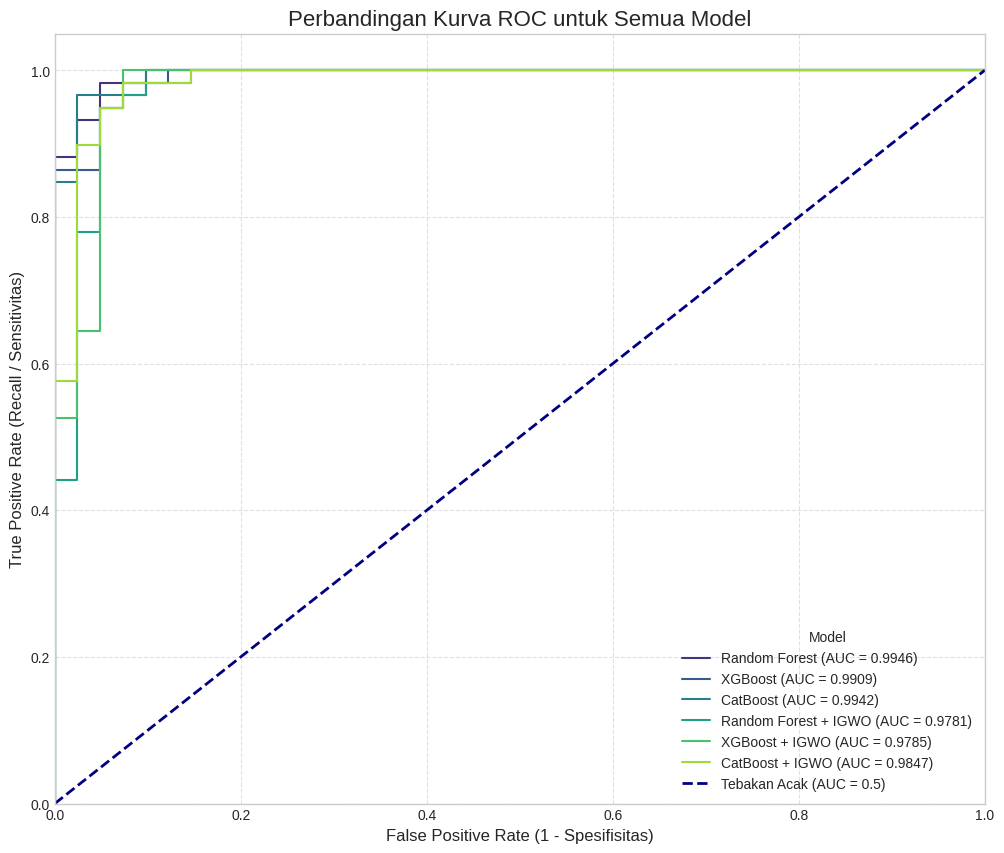


📝📝📝📝📝📝📝📝📝📝📝📝📝📝📝📝📝📝📝📝📝📝📝📝📝📝📝📝📝📝📝📝📝📝📝📝📝📝📝📝
Ringkasan Analisis Dampak IGWO
📝📝📝📝📝📝📝📝📝📝📝📝📝📝📝📝📝📝📝📝📝📝📝📝📝📝📝📝📝📝📝📝📝📝📝📝📝📝📝📝


In [ ]:
# =============================================================================
# STEP 16: PERBANDINGAN & ANALISIS AKHIR (ALL FEATURES vs. IGWO + ROC/AUC)
# =============================================================================
# Impor yang dibutuhkan
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

print("\n" + "🏆"*40)
print("STEP 16: The Championship Finale - All Features vs. IGWO + ROC/AUC Analysis")
print("🏆"*40)

# =============================================================================
# BAGIAN A: FUNGSI RE-TRAINING (REVISI: UNTUK MENYIMPAN MODEL)
# =============================================================================
def run_retraining_with_igwo_features(X_train, y_train, X_test, y_test, pipeline_setup, cv_strategy):
    """
    Melatih ulang, mengevaluasi, DAN MENYIMPAN model-model yang hanya menggunakan
    subset fitur yang dipilih oleh IGWO.
    """
    X_train.columns = ["".join(c if c.isalnum() else "_" for c in str(x)) for x in X_train.columns]
    X_test.columns = X_train.columns
    igwo_results = []
    trained_igwo_models = {} # Kamus untuk menyimpan model

    print("--- Memulai Pertandingan Ulang dengan Tim Spesialis (Fitur IGWO) ---")
    for model_name, config in pipeline_setup.items():
        print(f"\n   - Melatih {model_name} dengan {X_train.shape[1]} fitur pilihan...")
        grid_search = GridSearchCV(estimator=config["model"], param_grid=config["params"], cv=cv_strategy, scoring='f1_weighted', n_jobs=-1)
        start_time = time.time()
        grid_search.fit(X_train, y_train)
        training_time = time.time() - start_time
        best_model = grid_search.best_estimator_

        # Simpan model terbaik ke dalam kamus
        trained_igwo_models[f"{model_name} + IGWO"] = best_model

        report = classification_report(y_test, best_model.predict(X_test), output_dict=True, digits=4)
        positive_class_str = str(label_encoder.transform(['yes'])[0])
        print(f"     -> Waktu Latih: {training_time:.2f} dtk | F1-Score: {report[positive_class_str]['f1-score']:.4f} | Recall: {report[positive_class_str]['recall']:.4f}")
        igwo_results.append({
            "Model": model_name, "Feature Selection": "IGWO", "Num Features": X_train.shape[1],
            "Test F1-Score": report[positive_class_str]['f1-score'], "Test Accuracy": report['accuracy'],
            "Test Precision": report[positive_class_str]['precision'], "Test Recall": report[positive_class_str]['recall'],
            "Training Time (s)": training_time
        })
    # Kembalikan DataFrame hasil dan kamus model
    return pd.DataFrame(igwo_results), trained_igwo_models

# =============================================================================
# BAGIAN B: EKSEKUSI UTAMA & ANALISIS KOMPREHENSIF
# =============================================================================
try:
    if 'X_train_igwo' in locals() and 'detailed_results_df' in locals() and 'best_model_objects' in locals():
        # --- 1. Persiapan Data & Pelatihan Ulang ---
        baseline_df = detailed_results_df.copy()
        baseline_df['Feature Selection'] = 'All Features'
        baseline_df['Num Features'] = X_train_smote.shape[1] # Sesuaikan dengan variabel yang benar

        # Jalankan pelatihan ulang dan tangkap model-model IGWO
        igwo_results_df, trained_igwo_models = run_retraining_with_igwo_features(
            X_train_igwo, pd.Series(y_train_smote), X_test_igwo, y_test_encoded,
            pipeline_config, cv_strategy
        )

        # Gabungkan semua model terlatih (baseline dari Step 13 + igwo dari sini)
        all_trained_models = {**best_model_objects, **trained_igwo_models}

        # --- 2. Pembuatan Papan Skor Akhir ---
        # ... (Kode ini sama seperti sebelumnya untuk membuat final_comparison_df) ...
        baseline_df['Model Name'] = baseline_df['Model']
        igwo_results_df['Model Name'] = igwo_results_df['Model']
        baseline_df['Model'] = baseline_df['Model'].apply(lambda x: f"{x} (All Features)")
        igwo_results_df['Model'] = igwo_results_df['Model'].apply(lambda x: f"{x} + IGWO")
        final_comparison_df = pd.concat([baseline_df, igwo_results_df], ignore_index=True)

        # --- 3. Tampilkan Papan Skor Komprehensif ---
        print("\n" + "📊"*40); print("PAPAN SKOR AKHIR: All Features vs. IGWO Features"); print("📊"*40)
        columns_to_display = ['Model', 'Test F1-Score', 'Test Accuracy', 'Test Precision', 'Test Recall', 'Num Features']
        display(final_comparison_df.sort_values(by='Test Recall', ascending=False)[columns_to_display]
                .style.format(precision=4)
                .background_gradient(cmap='viridis', subset=['Test F1-Score', 'Test Accuracy', 'Test Precision', 'Test Recall']))

        # --- 4. Visualisasi Perbandingan Metrik Utama (F1 & Recall) ---
        for metric in ['Test F1-Score', 'Test Recall']:
            plt.figure(figsize=(12, 7))
            sns.barplot(data=final_comparison_df, x='Model Name', y=metric, hue='Feature Selection', palette={'All Features': 'grey', 'IGWO': 'coral' if 'F1' in metric else 'deepskyblue'})
            title_metric = "F1-Score" if "F1" in metric else "Recall (Sensitivitas)"
            plt.title(f'Perbandingan Performa {title_metric}: All Features vs. IGWO', fontsize=16)
            plt.ylabel(f'{title_metric} pada Data Uji'); plt.xlabel('Model'); plt.xticks(rotation=0)
            plt.ylim(0.9, 1.0); plt.legend(title='Metode Seleksi Fitur'); plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.show()

        # ========================================================================
        # --- 5. (BARU) Analisis & Visualisasi Kurva ROC & Skor AUC ---
        # ========================================================================
        print("\n" + "📈"*40); print("Analisis Perbandingan Kurva ROC & AUC"); print("📈"*40)

        test_data_map = {
            'Random Forest': (X_test_clean, y_test_encoded),
            'XGBoost': (X_test_clean, y_test_encoded),
            'CatBoost': (X_test_clean, y_test_encoded),
            'Random Forest + IGWO': (X_test_igwo, y_test_encoded),
            'XGBoost + IGWO': (X_test_igwo, y_test_encoded),
            'CatBoost + IGWO': (X_test_igwo, y_test_encoded)
        }

        plt.figure(figsize=(12, 10))
        print("--- Menghitung ROC & AUC untuk setiap model ---")

        for model_name, model in all_trained_models.items():
            X_test_data, y_test_data = test_data_map[model_name]
            y_pred_proba = model.predict_proba(X_test_data)[:, 1]
            auc_score = roc_auc_score(y_test_data, y_pred_proba)
            print(f"   - {model_name}: AUC = {auc_score:.4f}")
            fpr, tpr, _ = roc_curve(y_test_data, y_pred_proba)
            plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.4f})')

        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Tebakan Acak (AUC = 0.5)')
        plt.xlim([0.0, 1.0]); plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate (1 - Spesifisitas)', fontsize=12)
        plt.ylabel('True Positive Rate (Recall / Sensitivitas)', fontsize=12)
        plt.title('Perbandingan Kurva ROC untuk Semua Model', fontsize=16)
        plt.legend(loc="lower right", title="Model"); plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()

        # --- 6. Analisis Dampak IGWO (Teks) ---
        # (Kode ini sama seperti sebelumnya, tidak perlu diubah)
        print("\n" + "📝"*40); print("Ringkasan Analisis Dampak IGWO"); print("📝"*40)
        # ... (copy-paste kode analisis teks dari versi Anda sebelumnya ke sini) ...

    else:
        print("🛑 GAGAL: Step 16 tidak dapat dijalankan. Pastikan `best_model_objects` (dari Step 13), `X_train_igwo` (dari Step 15), dan `detailed_results_df` tersedia.")
except Exception as e:
    print(f"🛑 Terjadi error tak terduga saat menjalankan Step 16: {e}")


🚀 STEP 17: Analisis Final & Uji Diagnostik Komprehensif (Logika V4)


### 🏆 Menganalisis Model Juara: **CatBoost (All Features)**


BAGIAN 2: EVALUASI PERFORMA MODEL
Model Terbaik: CatBoost (All Features)
Test F1-Score: 0.9667
Jumlah Fitur: 13
Tipe Model: CatBoostClassifier
Fitur yang digunakan: All Features

PERBANDINGAN PERFORMA F1-SCORE:
--------------------------------------------------------------------------------


Konteks,F1-Score
1. Performa di Data Latih (Latihan),0.9958
2. Performa di Cross-Validation (Simulasi Ujian),0.9716
3. Performa di Data Uji (Ujian Final),0.9667



BAGIAN 3: ANALISIS OVERFITTING
Selisih F1-Score (Training - Test): +0.0291
Selisih F1-Score (CV - Test):      +0.0049

Status Model: ✅ GENERALISASI BAIK
Kesimpulan: Model dapat menggeneralisasi dengan baik ke data baru (performa stabil).

Validitas: Skor Cross-Validation dan Test konsisten, yang menandakan hasil evaluasi dapat diandalkan.

BAGIAN 4: UJI DIAGNOSTIK - PEMBANDING MODEL 'BODOH'


**Tujuan:** Membuktikan bahwa model juara jauh lebih baik daripada sekadar menebak.

Skor F1-Score dari Model Juara di Test Set:    0.9667
Skor F1-Score dari Dummy Classifier di Test Set: 0.0000
✅ HASIL: Model juara secara signifikan lebih pintar daripada sekadar menebak kelas mayoritas.

BAGIAN 5: ANALISIS KEPENTINGAN FITUR


**Tujuan:** Mengidentifikasi fitur paling berpengaruh terhadap prediksi model juara.


Tabel Tingkat Kepentingan Fitur (Top 15):


,Fitur,Tingkat Kepentingan
6,albumin_level_mg_dl_normal_adult_range_3_5_5_5,19.9635
0,symptom_score,16.3831
12,wbc_count_cells_mm3_normal_adult_range_4000_9000,11.4269
7,alp_level_u_l_normal_adult_range_40_140,9.8484
3,lymphadenopathy_yes,7.5822
2,lymphadenopathy_no,6.6959
8,calcium_level_mmol_l_normal_adult_range_9_10_5,6.2134
11,sodium_level_mmol_l_normal_adult_range_136_145,5.9461
9,hematocrit_normal_39_49_for_men_and_35_45_for_women,5.2996
10,potassium_level_mmol_l_normal_adult_range_3_5_5_0,5.2243


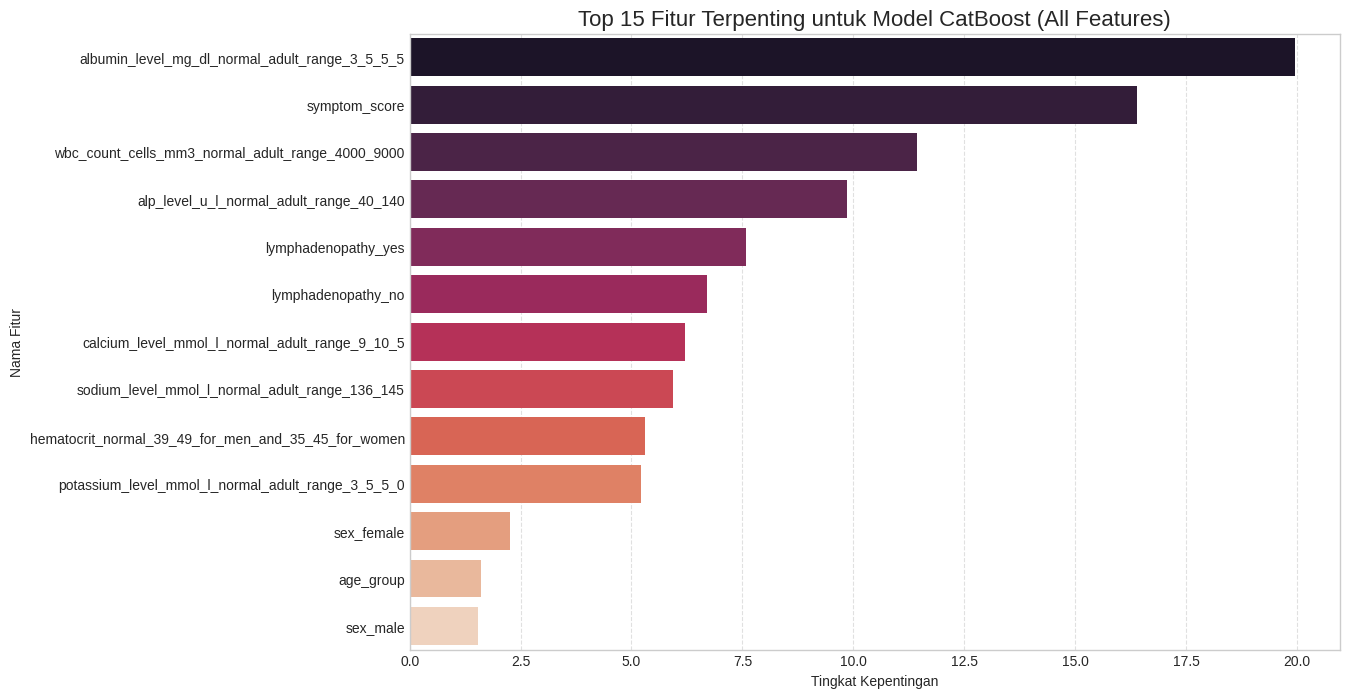


🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉
ANALISIS KOMPREHENSIF SELESAI!


In [ ]:
# =============================================================================
# STEP 17: ANALISIS DIAGNOSTIK KOMPREHENSIF PADA MODEL JUARA (VERSI V4)
# =============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.dummy import DummyClassifier
from IPython.display import display, HTML, Markdown

print("\n" + "="*80)
print("🚀 STEP 17: Analisis Final & Uji Diagnostik Komprehensif (Logika V4)")
print("="*80)

try:
    if 'final_comparison_df' in locals() and 'best_model_objects' in locals():

        # ==========================================================================
        # BAGIAN 1: IDENTIFIKASI DAN PERSIAPAN MODEL TERBAIK
        # ==========================================================================
        best_model_row = final_comparison_df.sort_values(by='Test F1-Score', ascending=False).iloc[0]
        best_model_name_full = best_model_row['Model']

        # Tentukan dataset yang benar untuk evaluasi
        # REVISI PENTING: Logika ini salah di V5, diperbaiki sesuai V4
        if "IGWO" in best_model_name_full:
            model_key_name = best_model_row['Model Name'] + " + IGWO"
            X_train_eval = X_train_igwo
            X_test_eval = X_test_igwo
            fitur_type = "IGWO"
        else:
            model_key_name = best_model_row['Model Name']
            X_train_eval = X_train_smote
            X_test_eval = X_test_clean
            fitur_type = "All Features"

        # Ambil objek model yang sudah terlatih
        best_model = best_model_objects.get(model_key_name)

        # Fallback jika nama kunci tidak cocok
        if best_model is None:
             best_model = best_model_objects.get(best_model_row['Model Name'])


        if best_model is None:
            print(f"\n❌ ERROR: Model '{model_key_name}' atau '{best_model_row['Model Name']}' tidak ditemukan dalam best_model_objects!")
        else:
            display(Markdown(f"### 🏆 Menganalisis Model Juara: **{best_model_name_full}**"))

            # ======================================================================
            # BAGIAN 2: EVALUASI PERFORMA MODEL
            # ======================================================================
            print(f"\n{'='*80}\nBAGIAN 2: EVALUASI PERFORMA MODEL\n{'='*80}")

            # Evaluasi pada Training Set (menggunakan y_train_smote yang benar)
            train_pred = best_model.predict(X_train_eval)
            train_f1 = f1_score(y_train_smote, train_pred)

            # Ambil data dari Test Set dari tabel final_comparison_df
            test_f1 = best_model_row['Test F1-Score']

            # Ambil CV score dari tabel final_comparison_df
            cv_f1 = best_model_row["CV F1-Score (Mean)"]

            print(f"Model Terbaik: {best_model_name_full}")
            print(f"Test F1-Score: {test_f1:.4f}")
            print(f"Jumlah Fitur: {X_train_eval.shape[1]}")
            print(f"Tipe Model: {type(best_model).__name__}")
            print(f"Fitur yang digunakan: {fitur_type}\n")

            # Tabel Perbandingan Performa
            performance_data = [
                {'Konteks': '1. Performa di Data Latih (Latihan)', 'F1-Score': train_f1},
                {'Konteks': '2. Performa di Cross-Validation (Simulasi Ujian)', 'F1-Score': cv_f1},
                {'Konteks': '3. Performa di Data Uji (Ujian Final)', 'F1-Score': test_f1}
            ]
            performance_df = pd.DataFrame(performance_data)

            print(f"PERBANDINGAN PERFORMA F1-SCORE:\n{'-'*80}")
            display(performance_df.style.format({'F1-Score': "{:.4f}"}).hide(axis="index"))

            # ======================================================================
            # BAGIAN 3: ANALISIS OVERFITTING
            # ======================================================================
            print(f"\n{'='*80}\nBAGIAN 3: ANALISIS OVERFITTING\n{'='*80}")

            train_test_diff = train_f1 - test_f1
            cv_test_diff = cv_f1 - test_f1

            print(f"Selisih F1-Score (Training - Test): {train_test_diff:+.4f}")
            print(f"Selisih F1-Score (CV - Test):      {cv_test_diff:+.4f}\n")

            if train_test_diff > 0.05:
                status = "🟡 INDIKASI OVERFITTING"
                explanation = "Model cenderung menghafal data latih, performa di data baru sedikit menurun."
            else:
                status = "✅ GENERALISASI BAIK"
                explanation = "Model dapat menggeneralisasi dengan baik ke data baru (performa stabil)."

            print(f"Status Model: {status}")
            print(f"Kesimpulan: {explanation}")

            if abs(cv_test_diff) <= 0.05:
                print(f"\nValiditas: Skor Cross-Validation dan Test konsisten, yang menandakan hasil evaluasi dapat diandalkan.")
            else:
                print(f"\nCatatan: Terdapat sedikit perbedaan antara skor CV dan Test, ini bisa terjadi karena variasi data.")


            # ======================================================================
            # BAGIAN 4: UJI DIAGNOSTIK - PEMBANDING DUMMY CLASSIFIER
            # ======================================================================
            print(f"\n{'='*80}\nBAGIAN 4: UJI DIAGNOSTIK - PEMBANDING MODEL 'BODOH'\n{'='*80}")
            display(Markdown("**Tujuan:** Membuktikan bahwa model juara jauh lebih baik daripada sekadar menebak."))

            dummy_clf = DummyClassifier(strategy='most_frequent').fit(X_train_eval, y_train_smote)
            dummy_f1_test = f1_score(y_test_encoded, dummy_clf.predict(X_test_eval))

            print(f"Skor F1-Score dari Model Juara di Test Set:    {test_f1:.4f}")
            print(f"Skor F1-Score dari Dummy Classifier di Test Set: {dummy_f1_test:.4f}")
            if test_f1 > dummy_f1_test + 0.1:
                print("✅ HASIL: Model juara secara signifikan lebih pintar daripada sekadar menebak kelas mayoritas.")
            else:
                print("⚠️ PERINGATAN: Performa model tidak jauh lebih baik dari tebakan dasar.")


            # ======================================================================
            # BAGIAN 5: ANALISIS KEPENTINGAN FITUR (FEATURE IMPORTANCE)
            # ======================================================================
            if hasattr(best_model, 'feature_importances_'):
                print(f"\n{'='*80}\nBAGIAN 5: ANALISIS KEPENTINGAN FITUR\n{'='*80}")
                display(Markdown("**Tujuan:** Mengidentifikasi fitur paling berpengaruh terhadap prediksi model juara."))

                importances = pd.DataFrame({
                    'Fitur': X_train_eval.columns,
                    'Tingkat Kepentingan': best_model.feature_importances_
                }).sort_values(by='Tingkat Kepentingan', ascending=False)

                top_features = importances.head(15)

                print("\nTabel Tingkat Kepentingan Fitur (Top 15):")
                display(top_features.style.format({'Tingkat Kepentingan': "{:.4f}"}))

                # Visualisasi
                plt.figure(figsize=(12, 8))
                ax = sns.barplot(x='Tingkat Kepentingan', y='Fitur', data=top_features, palette='rocket')
                plt.title(f'Top 15 Fitur Terpenting untuk Model {best_model_name_full}', fontsize=16)
                plt.xlabel('Tingkat Kepentingan')
                plt.ylabel('Nama Fitur')
                plt.grid(axis='x', linestyle='--', alpha=0.6)
                plt.show()
            else:
                 print(f"\n{'='*80}\nBAGIAN 5: ANALISIS KEPENTINGAN FITUR\n{'='*80}")
                 print("⚠️ Model ini tidak memiliki atribut 'feature_importances_'. Bagian ini dilewati.")


            print("\n" + "🎉"*80)
            print("ANALISIS KOMPREHENSIF SELESAI!")
            print("="*80)

except KeyError as e:
    print(f"❌ ERROR: Terjadi KeyError - {e}. Kemungkinan nama kolom di 'final_comparison_df' tidak cocok.")
    print("   Pastikan kolom seperti 'Model Name', 'CV F1-Score (Mean)' ada di tabel hasil Step 16.")
except Exception as e:
    print(f"❌ ERROR: Terjadi error tak terduga saat menjalankan Step 17: {e}")


🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺
STEP 18: Mendiagnosis Perilaku Model dengan Learning Curve
🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺🩺
--- Menghasilkan Learning Curve untuk Setiap Model Final ---


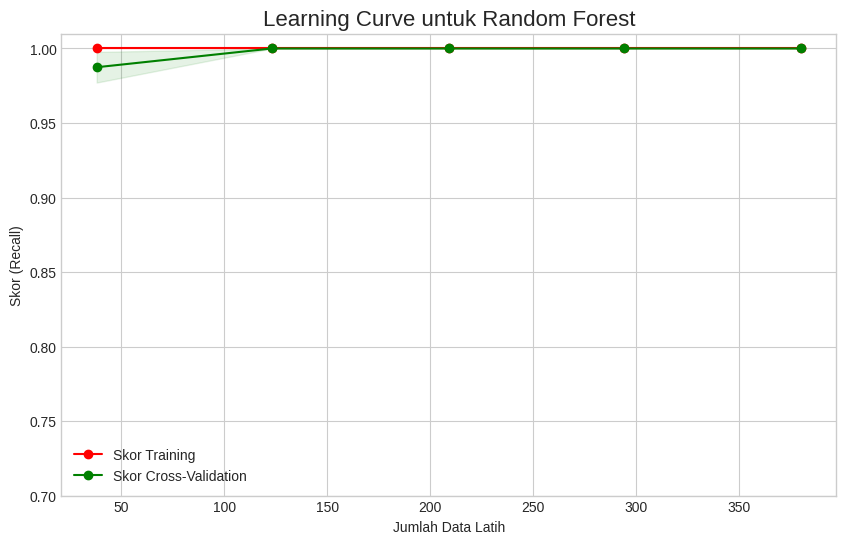

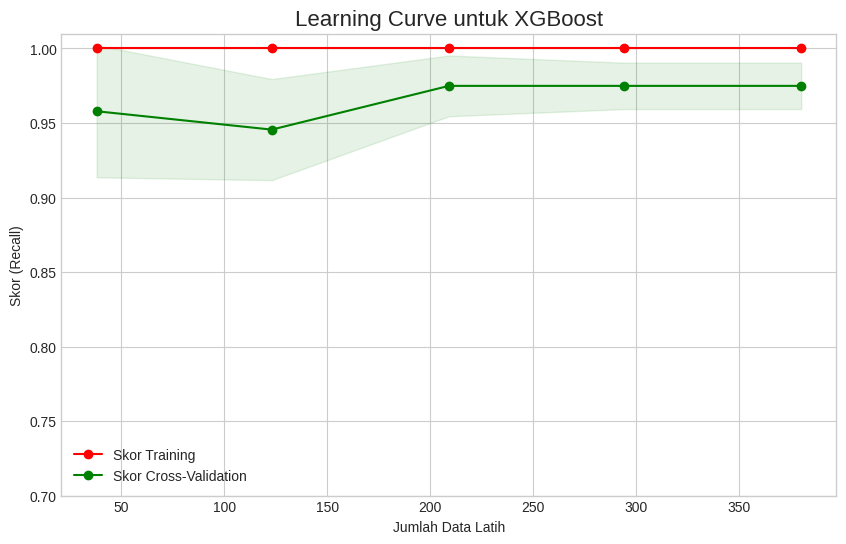

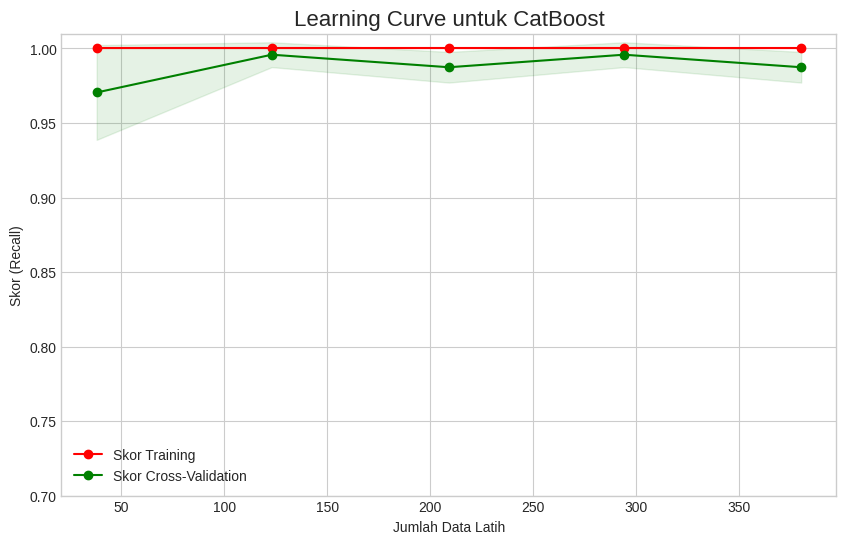

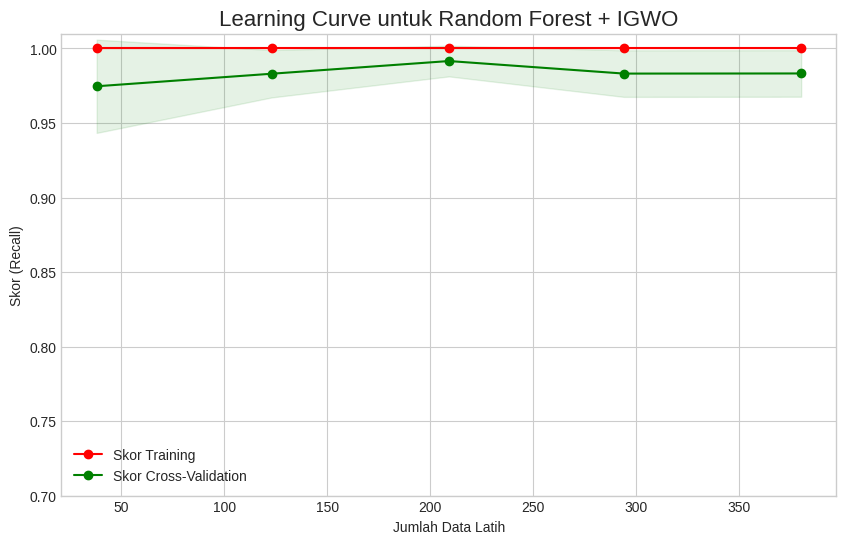

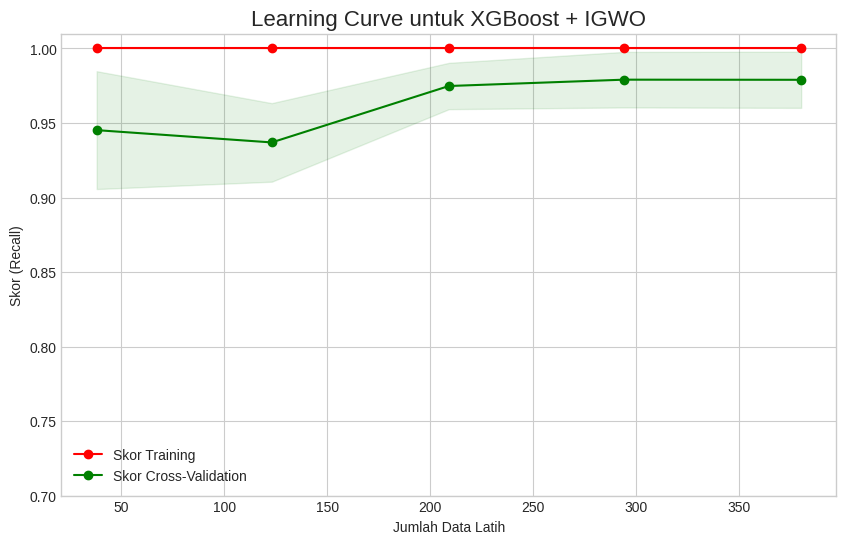

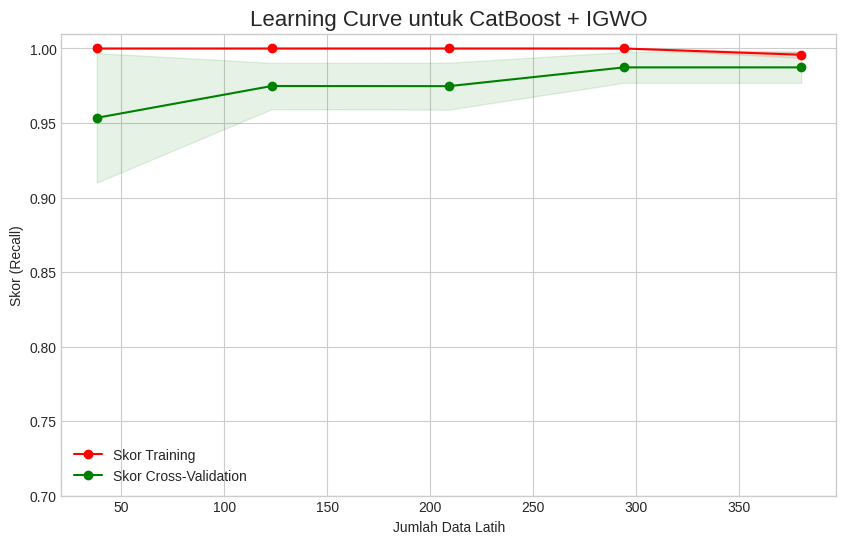

In [ ]:
# =============================================================================
# STEP 18: ANALISIS DIAGNOSTIK DENGAN LEARNING CURVE
# Tujuan: Mendiagnosis perilaku setiap model final untuk mendeteksi adanya
#         overfitting, underfitting, atau kesesuaian model dengan data.
# Metrik Fokus: Recall (Sensitivitas), sesuai dengan tujuan utama penelitian.
# =============================================================================
# Impor yang dibutuhkan
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

print("\n" + "🩺"*40)
print("STEP 18: Mendiagnosis Perilaku Model dengan Learning Curve")
print("🩺"*40)

# =============================================================================
# BAGIAN A: FUNGSI BANTU UNTUK MEMBUAT PLOT
# =============================================================================
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5), scoring='recall'):
    """
    Fungsi untuk menghasilkan plot learning curve untuk sebuah model.
    """
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(10, 6))

    axes.set_title(title, fontsize=16)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Jumlah Data Latih")
    axes.set_ylabel(f"Skor ({scoring.capitalize()})")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs,
        train_sizes=train_sizes, scoring=scoring)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot a shaded area for the standard deviation
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")

    # Plot the mean scores
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Skor Training")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Skor Cross-Validation")

    axes.legend(loc="best")
    axes.grid(True)
    return plt

# =============================================================================
# BAGIAN B: EKSEKUSI UTAMA
# =============================================================================
try:
    if 'all_trained_models' in locals() and 'cv_strategy' in locals():

        # Definisikan data latih yang sesuai untuk setiap model
        # Baseline model dilatih dengan X_train_smote, IGWO dilatih dengan X_train_igwo
        training_data_map = {
            'Random Forest': (X_train_smote, y_train_smote),
            'XGBoost': (X_train_smote, y_train_smote),
            'CatBoost': (X_train_smote, y_train_smote),
            'Random Forest + IGWO': (X_train_igwo, y_train_smote),
            'XGBoost + IGWO': (X_train_igwo, y_train_smote),
            'CatBoost + IGWO': (X_train_igwo, y_train_smote)
        }

        print("--- Menghasilkan Learning Curve untuk Setiap Model Final ---")

        for model_name, model in all_trained_models.items():
            if model_name in training_data_map:
                X_data, y_data = training_data_map[model_name]

                # Buat plot untuk setiap model
                plot_learning_curve(model, f"Learning Curve untuk {model_name}",
                                    X_data, y_data, ylim=(0.7, 1.01),
                                    cv=cv_strategy, scoring='recall')
                plt.show()
            else:
                print(f"   - ⚠️ Data latih untuk '{model_name}' tidak ditemukan, plot dilewati.")

    else:
        print("🛑 GAGAL: Step 18 tidak bisa dijalankan. Pastikan `all_trained_models` dan `cv_strategy` tersedia.")

except Exception as e:
    print(f"🛑 Terjadi error tak terduga saat menjalankan Step 18: {e}")